In [1]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
from Inference.GeNVI_method import GeNVariationalInference, GeNetEns
from Inference.GeNVI_predictive import GeNPredVI, GeNetEns

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
predictive=False

In [4]:
from Experiments.foong import Setup
layerwidth=50
nblayers=1
setup=Setup(device,layerwidth=layerwidth,nblayers=nblayers)


# Target density #

In [5]:
logprior=setup.logPredPrior
loglikelihood=setup.loglikelihood
projection=setup.projection
size_sample=setup.n_train_samples
param_count=setup.param_count
model=setup._model
logposterior=setup.logposterior

size_sample

200

# GeNVI #

In [6]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001
ensemble_size=1
lat_dim=10

GeN = GeNetEns(ensemble_size, lat_dim, 50, param_count, activation, 1., init_b, device)

In [7]:
%matplotlib inline
from tempfile import TemporaryDirectory

k_MC=300

def show(x,y):
    return

if predictive:
    with TemporaryDirectory() as temp_dir:
        optimizer = GeNPredVI(loglikelihood, logprior, projection, k_MC,
                                                0, 100, 1000, 50, 50,
                                                20000, .01, .00001, 200, .5,
                                                device, True, temp_dir, save_best=True)
        best_epoch, scores=optimizer.run(GeN,show)
else:
    with TemporaryDirectory() as temp_dir:
        optimizer = GeNVariationalInference(logposterior,
                                                1, 100, 1000, 50, 100,
                                                20000, .01, .000001, 500, .5,
                                                device, True, temp_dir, save_best=True)
        best_epoch, scores=optimizer.run(GeN)
print(best_epoch)

Epoch [0/20000], Loss: 5098676.5, Entropy 330.00732421875, Learning Rate: 0.01
Epoch [1/20000], Loss: 3124622.75, Entropy 334.0908203125, Learning Rate: 0.01
Epoch [2/20000], Loss: 2160872.5, Entropy 337.10382080078125, Learning Rate: 0.01
Epoch [3/20000], Loss: 2173158.25, Entropy 330.04779052734375, Learning Rate: 0.01
Epoch [4/20000], Loss: 2234309.25, Entropy 333.0791015625, Learning Rate: 0.01
Epoch [5/20000], Loss: 1664206.875, Entropy 331.58953857421875, Learning Rate: 0.01
Epoch [6/20000], Loss: 1313303.625, Entropy 329.7799072265625, Learning Rate: 0.01
Epoch [7/20000], Loss: 1239894.875, Entropy 318.9219970703125, Learning Rate: 0.01
Epoch [8/20000], Loss: 1024020.75, Entropy 322.55511474609375, Learning Rate: 0.01
Epoch [9/20000], Loss: 984173.625, Entropy 319.2825927734375, Learning Rate: 0.01
Epoch [10/20000], Loss: 847285.375, Entropy 323.55029296875, Learning Rate: 0.01
Epoch [11/20000], Loss: 1049344.75, Entropy 321.9801025390625, Learning Rate: 0.01
Epoch [12/20000], L

Epoch [115/20000], Loss: 56612.77734375, Entropy 253.3523712158203, Learning Rate: 0.01
Epoch [116/20000], Loss: 53849.5703125, Entropy 252.52781677246094, Learning Rate: 0.01
Epoch [117/20000], Loss: 62595.7109375, Entropy 252.18943786621094, Learning Rate: 0.01
Epoch [118/20000], Loss: 63643.62109375, Entropy 260.23834228515625, Learning Rate: 0.01
Epoch [119/20000], Loss: 55154.77734375, Entropy 258.2515869140625, Learning Rate: 0.01
Epoch [120/20000], Loss: 50317.51953125, Entropy 260.05267333984375, Learning Rate: 0.01
Epoch [121/20000], Loss: 63738.63671875, Entropy 256.80126953125, Learning Rate: 0.01
Epoch [122/20000], Loss: 54671.15234375, Entropy 248.4181671142578, Learning Rate: 0.01
Epoch [123/20000], Loss: 41747.34765625, Entropy 257.76934814453125, Learning Rate: 0.01
Epoch [124/20000], Loss: 58279.58203125, Entropy 243.5494842529297, Learning Rate: 0.01
Epoch [125/20000], Loss: 52548.4609375, Entropy 247.56809997558594, Learning Rate: 0.01
Epoch [126/20000], Loss: 47777.

Epoch [232/20000], Loss: 14661.466796875, Entropy 216.2627716064453, Learning Rate: 0.01
Epoch [233/20000], Loss: 13869.169921875, Entropy 221.10731506347656, Learning Rate: 0.01
Epoch [234/20000], Loss: 16211.5185546875, Entropy 223.19419860839844, Learning Rate: 0.01
Epoch [235/20000], Loss: 13698.6689453125, Entropy 218.9001922607422, Learning Rate: 0.01
Epoch [236/20000], Loss: 16660.759765625, Entropy 214.81126403808594, Learning Rate: 0.01
Epoch [237/20000], Loss: 13295.8623046875, Entropy 218.85496520996094, Learning Rate: 0.01
Epoch [238/20000], Loss: 14095.1376953125, Entropy 218.41123962402344, Learning Rate: 0.01
Epoch [239/20000], Loss: 14279.642578125, Entropy 223.3577117919922, Learning Rate: 0.01
Epoch [240/20000], Loss: 16945.623046875, Entropy 214.52598571777344, Learning Rate: 0.01
Epoch [241/20000], Loss: 13193.3193359375, Entropy 217.93553161621094, Learning Rate: 0.01
Epoch [242/20000], Loss: 15963.00390625, Entropy 210.9674530029297, Learning Rate: 0.01
Epoch [243

Epoch [346/20000], Loss: 6629.23876953125, Entropy 199.06678771972656, Learning Rate: 0.01
Epoch [347/20000], Loss: 6336.8095703125, Entropy 198.09767150878906, Learning Rate: 0.01
Epoch [348/20000], Loss: 6097.7041015625, Entropy 197.86790466308594, Learning Rate: 0.01
Epoch [349/20000], Loss: 7020.1259765625, Entropy 187.56590270996094, Learning Rate: 0.01
Epoch [350/20000], Loss: 6223.03759765625, Entropy 191.61756896972656, Learning Rate: 0.01
Epoch [351/20000], Loss: 5883.94677734375, Entropy 195.6501922607422, Learning Rate: 0.01
Epoch [352/20000], Loss: 6698.08544921875, Entropy 195.76332092285156, Learning Rate: 0.01
Epoch [353/20000], Loss: 6405.2578125, Entropy 189.5955352783203, Learning Rate: 0.01
Epoch [354/20000], Loss: 6224.54638671875, Entropy 191.10585021972656, Learning Rate: 0.01
Epoch [355/20000], Loss: 5773.99365234375, Entropy 192.16050720214844, Learning Rate: 0.01
Epoch [356/20000], Loss: 6136.35888671875, Entropy 189.15745544433594, Learning Rate: 0.01
Epoch [3

Epoch [461/20000], Loss: 4060.765380859375, Entropy 176.6173858642578, Learning Rate: 0.01
Epoch [462/20000], Loss: 3654.28515625, Entropy 173.20640563964844, Learning Rate: 0.01
Epoch [463/20000], Loss: 3883.126220703125, Entropy 176.44004821777344, Learning Rate: 0.01
Epoch [464/20000], Loss: 3577.03662109375, Entropy 175.2416229248047, Learning Rate: 0.01
Epoch [465/20000], Loss: 3734.9052734375, Entropy 180.49388122558594, Learning Rate: 0.01
Epoch [466/20000], Loss: 4073.511962890625, Entropy 173.28489685058594, Learning Rate: 0.01
Epoch [467/20000], Loss: 3709.50341796875, Entropy 177.05076599121094, Learning Rate: 0.01
Epoch [468/20000], Loss: 3966.81005859375, Entropy 170.52137756347656, Learning Rate: 0.01
Epoch [469/20000], Loss: 3561.9765625, Entropy 178.53282165527344, Learning Rate: 0.01
Epoch [470/20000], Loss: 3048.151123046875, Entropy 182.97837829589844, Learning Rate: 0.01
Epoch [471/20000], Loss: 4176.1162109375, Entropy 174.4420623779297, Learning Rate: 0.01
Epoch [

Epoch [576/20000], Loss: 2741.491943359375, Entropy 158.37074279785156, Learning Rate: 0.01
Epoch [577/20000], Loss: 2135.973388671875, Entropy 165.44923400878906, Learning Rate: 0.01
Epoch [578/20000], Loss: 2640.6708984375, Entropy 167.3184051513672, Learning Rate: 0.01
Epoch [579/20000], Loss: 2250.050048828125, Entropy 150.8814239501953, Learning Rate: 0.01
Epoch [580/20000], Loss: 2067.44140625, Entropy 168.15391540527344, Learning Rate: 0.01
Epoch [581/20000], Loss: 2639.940185546875, Entropy 154.28016662597656, Learning Rate: 0.01
Epoch [582/20000], Loss: 2463.681396484375, Entropy 175.10484313964844, Learning Rate: 0.01
Epoch [583/20000], Loss: 2424.21240234375, Entropy 166.0305938720703, Learning Rate: 0.01
Epoch [584/20000], Loss: 2577.528076171875, Entropy 159.03367614746094, Learning Rate: 0.01
Epoch [585/20000], Loss: 2218.489990234375, Entropy 167.3223114013672, Learning Rate: 0.01
Epoch [586/20000], Loss: 2479.079833984375, Entropy 156.84764099121094, Learning Rate: 0.01

Epoch [690/20000], Loss: 2150.3310546875, Entropy 153.02049255371094, Learning Rate: 0.01
Epoch [691/20000], Loss: 1938.7392578125, Entropy 165.35279846191406, Learning Rate: 0.01
Epoch [692/20000], Loss: 2471.922119140625, Entropy 152.3596954345703, Learning Rate: 0.01
Epoch [693/20000], Loss: 2091.63671875, Entropy 159.3927764892578, Learning Rate: 0.01
Epoch [694/20000], Loss: 1849.2999267578125, Entropy 155.2097930908203, Learning Rate: 0.01
Epoch [695/20000], Loss: 1785.8778076171875, Entropy 150.58152770996094, Learning Rate: 0.01
Epoch [696/20000], Loss: 1711.8753662109375, Entropy 153.1402130126953, Learning Rate: 0.01
Epoch [697/20000], Loss: 2019.0438232421875, Entropy 151.7999725341797, Learning Rate: 0.01
Epoch [698/20000], Loss: 2103.84814453125, Entropy 152.69105529785156, Learning Rate: 0.01
Epoch [699/20000], Loss: 1920.9521484375, Entropy 158.49806213378906, Learning Rate: 0.01
Epoch [700/20000], Loss: 2175.57666015625, Entropy 155.99684143066406, Learning Rate: 0.01
E

Epoch [805/20000], Loss: 1434.708251953125, Entropy 149.13121032714844, Learning Rate: 0.01
Epoch [806/20000], Loss: 1852.7369384765625, Entropy 153.5254669189453, Learning Rate: 0.01
Epoch [807/20000], Loss: 1507.91015625, Entropy 148.6328887939453, Learning Rate: 0.01
Epoch [808/20000], Loss: 1353.3370361328125, Entropy 144.9745635986328, Learning Rate: 0.01
Epoch [809/20000], Loss: 1352.7275390625, Entropy 141.8341522216797, Learning Rate: 0.01
Epoch [810/20000], Loss: 1694.53271484375, Entropy 134.7393341064453, Learning Rate: 0.01
Epoch [811/20000], Loss: 1236.3619384765625, Entropy 137.63221740722656, Learning Rate: 0.01
Epoch [812/20000], Loss: 1325.305908203125, Entropy 150.4868621826172, Learning Rate: 0.01
Epoch [813/20000], Loss: 1328.7139892578125, Entropy 145.9500274658203, Learning Rate: 0.01
Epoch [814/20000], Loss: 1600.0076904296875, Entropy 142.84669494628906, Learning Rate: 0.01
Epoch [815/20000], Loss: 1217.3463134765625, Entropy 134.2798614501953, Learning Rate: 0.

Epoch [921/20000], Loss: 1201.172607421875, Entropy 142.8770294189453, Learning Rate: 0.01
Epoch [922/20000], Loss: 1197.403564453125, Entropy 135.1186065673828, Learning Rate: 0.01
Epoch [923/20000], Loss: 1236.602294921875, Entropy 143.07374572753906, Learning Rate: 0.01
Epoch [924/20000], Loss: 1473.7469482421875, Entropy 144.6471405029297, Learning Rate: 0.01
Epoch [925/20000], Loss: 1453.1158447265625, Entropy 133.8537139892578, Learning Rate: 0.01
Epoch [926/20000], Loss: 1391.739501953125, Entropy 132.27406311035156, Learning Rate: 0.01
Epoch [927/20000], Loss: 1358.062255859375, Entropy 133.92710876464844, Learning Rate: 0.01
Epoch [928/20000], Loss: 1135.9119873046875, Entropy 132.83460998535156, Learning Rate: 0.01
Epoch [929/20000], Loss: 1563.07177734375, Entropy 135.7695770263672, Learning Rate: 0.01
Epoch [930/20000], Loss: 1309.5943603515625, Entropy 141.2314910888672, Learning Rate: 0.01
Epoch [931/20000], Loss: 1339.7509765625, Entropy 141.45863342285156, Learning Rate

Epoch [1036/20000], Loss: 1006.4444580078125, Entropy 128.91978454589844, Learning Rate: 0.01
Epoch [1037/20000], Loss: 907.7134399414062, Entropy 134.5143585205078, Learning Rate: 0.01
Epoch [1038/20000], Loss: 931.2147216796875, Entropy 122.76402282714844, Learning Rate: 0.01
Epoch [1039/20000], Loss: 1083.65673828125, Entropy 123.82899475097656, Learning Rate: 0.01
Epoch [1040/20000], Loss: 1037.5966796875, Entropy 130.74095153808594, Learning Rate: 0.01
Epoch [1041/20000], Loss: 898.2698364257812, Entropy 135.8290557861328, Learning Rate: 0.01
Epoch [1042/20000], Loss: 1014.859130859375, Entropy 136.14527893066406, Learning Rate: 0.01
Epoch [1043/20000], Loss: 974.6866455078125, Entropy 131.91517639160156, Learning Rate: 0.01
Epoch [1044/20000], Loss: 1360.0831298828125, Entropy 132.51499938964844, Learning Rate: 0.01
Epoch [1045/20000], Loss: 1055.9559326171875, Entropy 134.81834411621094, Learning Rate: 0.01
Epoch [1046/20000], Loss: 1292.391845703125, Entropy 126.54093933105469,

Epoch [1153/20000], Loss: 1053.352294921875, Entropy 131.07188415527344, Learning Rate: 0.01
Epoch [1154/20000], Loss: 920.2469482421875, Entropy 128.32017517089844, Learning Rate: 0.01
Epoch [1155/20000], Loss: 949.0712890625, Entropy 117.53929138183594, Learning Rate: 0.01
Epoch [1156/20000], Loss: 1153.0704345703125, Entropy 117.22584533691406, Learning Rate: 0.01
Epoch [1157/20000], Loss: 980.4393310546875, Entropy 117.78770446777344, Learning Rate: 0.01
Epoch [1158/20000], Loss: 872.2864990234375, Entropy 122.50965881347656, Learning Rate: 0.01
Epoch [1159/20000], Loss: 916.8045654296875, Entropy 113.91661071777344, Learning Rate: 0.01
Epoch [1160/20000], Loss: 948.9401245117188, Entropy 122.35810852050781, Learning Rate: 0.01
Epoch [1161/20000], Loss: 807.3169555664062, Entropy 117.73692321777344, Learning Rate: 0.01
Epoch [1162/20000], Loss: 957.8239135742188, Entropy 126.45231628417969, Learning Rate: 0.01
Epoch [1163/20000], Loss: 933.30126953125, Entropy 118.45411682128906, L

Epoch [1270/20000], Loss: 719.5302124023438, Entropy 117.96794128417969, Learning Rate: 0.01
Epoch [1271/20000], Loss: 842.6766357421875, Entropy 121.65751647949219, Learning Rate: 0.01
Epoch [1272/20000], Loss: 756.4457397460938, Entropy 117.33476257324219, Learning Rate: 0.01
Epoch [1273/20000], Loss: 805.9054565429688, Entropy 113.24497985839844, Learning Rate: 0.01
Epoch [1274/20000], Loss: 948.0380249023438, Entropy 116.50727844238281, Learning Rate: 0.01
Epoch [1275/20000], Loss: 882.7445068359375, Entropy 119.41484069824219, Learning Rate: 0.01
Epoch [1276/20000], Loss: 1231.8016357421875, Entropy 117.49891662597656, Learning Rate: 0.01
Epoch [1277/20000], Loss: 717.14013671875, Entropy 122.24717712402344, Learning Rate: 0.01
Epoch [1278/20000], Loss: 935.2093505859375, Entropy 116.92649841308594, Learning Rate: 0.01
Epoch [1279/20000], Loss: 906.2093505859375, Entropy 102.34596252441406, Learning Rate: 0.01
Epoch [1280/20000], Loss: 957.5189208984375, Entropy 120.28526306152344

Epoch [1384/20000], Loss: 610.9285888671875, Entropy 105.34721374511719, Learning Rate: 0.01
Epoch [1385/20000], Loss: 698.0147094726562, Entropy 121.75712585449219, Learning Rate: 0.01
Epoch [1386/20000], Loss: 702.0321044921875, Entropy 106.52830505371094, Learning Rate: 0.01
Epoch [1387/20000], Loss: 653.6685791015625, Entropy 106.01423645019531, Learning Rate: 0.01
Epoch [1388/20000], Loss: 584.673095703125, Entropy 107.19114685058594, Learning Rate: 0.01
Epoch [1389/20000], Loss: 639.2024536132812, Entropy 104.46412658691406, Learning Rate: 0.01
Epoch [1390/20000], Loss: 669.2782592773438, Entropy 109.31806945800781, Learning Rate: 0.01
Epoch [1391/20000], Loss: 632.4834594726562, Entropy 106.63761901855469, Learning Rate: 0.01
Epoch [1392/20000], Loss: 624.0653686523438, Entropy 112.72706604003906, Learning Rate: 0.01
Epoch [1393/20000], Loss: 613.922607421875, Entropy 108.84205627441406, Learning Rate: 0.01
Epoch [1394/20000], Loss: 687.381103515625, Entropy 110.11915588378906, 

Epoch [1500/20000], Loss: 595.2839965820312, Entropy 103.04920959472656, Learning Rate: 0.01
Epoch [1501/20000], Loss: 652.3970947265625, Entropy 90.78944396972656, Learning Rate: 0.01
Epoch [1502/20000], Loss: 561.44482421875, Entropy 108.41206359863281, Learning Rate: 0.01
Epoch [1503/20000], Loss: 623.0963745117188, Entropy 104.98899841308594, Learning Rate: 0.01
Epoch [1504/20000], Loss: 666.6366577148438, Entropy 96.11140441894531, Learning Rate: 0.01
Epoch [1505/20000], Loss: 689.785888671875, Entropy 97.71842956542969, Learning Rate: 0.01
Epoch [1506/20000], Loss: 549.8704223632812, Entropy 107.09535217285156, Learning Rate: 0.01
Epoch [1507/20000], Loss: 754.2202758789062, Entropy 100.01341247558594, Learning Rate: 0.01
Epoch [1508/20000], Loss: 593.6343383789062, Entropy 94.77955627441406, Learning Rate: 0.01
Epoch [1509/20000], Loss: 629.9898681640625, Entropy 105.76603698730469, Learning Rate: 0.01
Epoch [1510/20000], Loss: 578.835205078125, Entropy 107.40617370605469, Learn

Epoch [1615/20000], Loss: 502.80169677734375, Entropy 104.67793273925781, Learning Rate: 0.01
Epoch [1616/20000], Loss: 583.3338623046875, Entropy 101.20631408691406, Learning Rate: 0.01
Epoch [1617/20000], Loss: 496.2784423828125, Entropy 89.52067565917969, Learning Rate: 0.01
Epoch [1618/20000], Loss: 502.1285400390625, Entropy 99.40260314941406, Learning Rate: 0.01
Epoch [1619/20000], Loss: 486.0372314453125, Entropy 95.20433044433594, Learning Rate: 0.01
Epoch [1620/20000], Loss: 471.3662109375, Entropy 99.99488830566406, Learning Rate: 0.01
Epoch [1621/20000], Loss: 569.7024536132812, Entropy 94.72624206542969, Learning Rate: 0.01
Epoch [1622/20000], Loss: 592.1746215820312, Entropy 97.27861022949219, Learning Rate: 0.01
Epoch [1623/20000], Loss: 497.6932067871094, Entropy 89.64395141601562, Learning Rate: 0.01
Epoch [1624/20000], Loss: 541.310546875, Entropy 96.05638122558594, Learning Rate: 0.01
Epoch [1625/20000], Loss: 481.4110107421875, Entropy 95.52662658691406, Learning Rat

Epoch [1731/20000], Loss: 640.6517333984375, Entropy 93.81245422363281, Learning Rate: 0.01
Epoch [1732/20000], Loss: 595.0463256835938, Entropy 98.28901672363281, Learning Rate: 0.01
Epoch [1733/20000], Loss: 606.4266967773438, Entropy 86.55049133300781, Learning Rate: 0.01
Epoch [1734/20000], Loss: 694.3753051757812, Entropy 89.37371826171875, Learning Rate: 0.01
Epoch [1735/20000], Loss: 508.28668212890625, Entropy 88.68641662597656, Learning Rate: 0.01
Epoch [1736/20000], Loss: 701.6177368164062, Entropy 90.38710021972656, Learning Rate: 0.01
Epoch [1737/20000], Loss: 551.6019287109375, Entropy 84.83877563476562, Learning Rate: 0.01
Epoch [1738/20000], Loss: 641.9496459960938, Entropy 95.51551818847656, Learning Rate: 0.01
Epoch [1739/20000], Loss: 582.0227661132812, Entropy 98.29197692871094, Learning Rate: 0.01
Epoch [1740/20000], Loss: 585.4617309570312, Entropy 90.31010437011719, Learning Rate: 0.01
Epoch [1741/20000], Loss: 764.061767578125, Entropy 93.38304138183594, Learning

Epoch [1847/20000], Loss: 472.7688903808594, Entropy 88.34799194335938, Learning Rate: 0.01
Epoch [1848/20000], Loss: 383.42864990234375, Entropy 87.58525085449219, Learning Rate: 0.01
Epoch [1849/20000], Loss: 389.765625, Entropy 75.47200012207031, Learning Rate: 0.01
Epoch [1850/20000], Loss: 372.822021484375, Entropy 87.35696411132812, Learning Rate: 0.01
Epoch [1851/20000], Loss: 383.9566650390625, Entropy 82.41606140136719, Learning Rate: 0.01
Epoch [1852/20000], Loss: 404.70733642578125, Entropy 85.42149353027344, Learning Rate: 0.01
Epoch [1853/20000], Loss: 464.6991271972656, Entropy 76.68014526367188, Learning Rate: 0.01
Epoch [1854/20000], Loss: 445.64178466796875, Entropy 90.0150146484375, Learning Rate: 0.01
Epoch [1855/20000], Loss: 433.9775390625, Entropy 84.26506042480469, Learning Rate: 0.01
Epoch [1856/20000], Loss: 416.89453125, Entropy 89.22428894042969, Learning Rate: 0.01
Epoch [1857/20000], Loss: 411.96209716796875, Entropy 85.99610900878906, Learning Rate: 0.01
E

Epoch [1962/20000], Loss: 430.33331298828125, Entropy 76.29916381835938, Learning Rate: 0.01
Epoch [1963/20000], Loss: 449.93359375, Entropy 83.81956481933594, Learning Rate: 0.01
Epoch [1964/20000], Loss: 395.26080322265625, Entropy 78.29684448242188, Learning Rate: 0.01
Epoch [1965/20000], Loss: 460.56634521484375, Entropy 77.81614685058594, Learning Rate: 0.01
Epoch [1966/20000], Loss: 394.875732421875, Entropy 77.20579528808594, Learning Rate: 0.01
Epoch [1967/20000], Loss: 463.68524169921875, Entropy 78.85528564453125, Learning Rate: 0.01
Epoch [1968/20000], Loss: 376.2275390625, Entropy 82.20758056640625, Learning Rate: 0.01
Epoch [1969/20000], Loss: 341.63909912109375, Entropy 84.10462951660156, Learning Rate: 0.01
Epoch [1970/20000], Loss: 463.05401611328125, Entropy 79.17643737792969, Learning Rate: 0.01
Epoch [1971/20000], Loss: 412.5972900390625, Entropy 81.68576049804688, Learning Rate: 0.01
Epoch [1972/20000], Loss: 586.8181762695312, Entropy 70.07679748535156, Learning Ra

Epoch [2079/20000], Loss: 346.54119873046875, Entropy 83.89674377441406, Learning Rate: 0.01
Epoch [2080/20000], Loss: 480.6083679199219, Entropy 73.34310913085938, Learning Rate: 0.01
Epoch [2081/20000], Loss: 467.0943603515625, Entropy 75.87799072265625, Learning Rate: 0.01
Epoch [2082/20000], Loss: 346.3007507324219, Entropy 79.79345703125, Learning Rate: 0.01
Epoch [2083/20000], Loss: 324.22052001953125, Entropy 83.45086669921875, Learning Rate: 0.01
Epoch [2084/20000], Loss: 308.18212890625, Entropy 72.54373168945312, Learning Rate: 0.01
Epoch [2085/20000], Loss: 323.77166748046875, Entropy 77.19644165039062, Learning Rate: 0.01
Epoch [2086/20000], Loss: 367.8185119628906, Entropy 88.34591674804688, Learning Rate: 0.01
Epoch [2087/20000], Loss: 400.4463195800781, Entropy 60.040863037109375, Learning Rate: 0.01
Epoch [2088/20000], Loss: 368.3047180175781, Entropy 77.41268920898438, Learning Rate: 0.01
Epoch [2089/20000], Loss: 412.02923583984375, Entropy 76.61395263671875, Learning

Epoch [2196/20000], Loss: 407.4779052734375, Entropy 73.81092834472656, Learning Rate: 0.01
Epoch [2197/20000], Loss: 383.91497802734375, Entropy 63.49079895019531, Learning Rate: 0.01
Epoch [2198/20000], Loss: 356.337646484375, Entropy 66.58470153808594, Learning Rate: 0.01
Epoch [2199/20000], Loss: 420.3826904296875, Entropy 71.60633850097656, Learning Rate: 0.01
Epoch [2200/20000], Loss: 429.7081604003906, Entropy 77.83050537109375, Learning Rate: 0.01
Epoch [2201/20000], Loss: 402.67327880859375, Entropy 71.63336181640625, Learning Rate: 0.01
Epoch [2202/20000], Loss: 357.6812744140625, Entropy 75.36802673339844, Learning Rate: 0.01
Epoch [2203/20000], Loss: 357.596923828125, Entropy 61.62696838378906, Learning Rate: 0.01
Epoch [2204/20000], Loss: 396.426025390625, Entropy 65.91177368164062, Learning Rate: 0.01
Epoch [2205/20000], Loss: 407.28363037109375, Entropy 70.2371826171875, Learning Rate: 0.01
Epoch [2206/20000], Loss: 329.72979736328125, Entropy 72.78709411621094, Learning

Epoch [2313/20000], Loss: 506.34893798828125, Entropy 70.07049560546875, Learning Rate: 0.01
Epoch [2314/20000], Loss: 371.5972900390625, Entropy 60.227081298828125, Learning Rate: 0.01
Epoch [2315/20000], Loss: 387.1813659667969, Entropy 76.16168212890625, Learning Rate: 0.01
Epoch [2316/20000], Loss: 479.373291015625, Entropy 65.60896301269531, Learning Rate: 0.01
Epoch [2317/20000], Loss: 348.46539306640625, Entropy 82.31101989746094, Learning Rate: 0.01
Epoch [2318/20000], Loss: 355.2257080078125, Entropy 74.60763549804688, Learning Rate: 0.01
Epoch [2319/20000], Loss: 523.1880493164062, Entropy 53.91462707519531, Learning Rate: 0.01
Epoch [2320/20000], Loss: 425.0456848144531, Entropy 67.44070434570312, Learning Rate: 0.01
Epoch [2321/20000], Loss: 332.93695068359375, Entropy 58.44734191894531, Learning Rate: 0.01
Epoch [2322/20000], Loss: 368.3804931640625, Entropy 68.89091491699219, Learning Rate: 0.01
Epoch [2323/20000], Loss: 351.81610107421875, Entropy 64.40513610839844, Lear

Epoch [2429/20000], Loss: 325.99169921875, Entropy 67.02140808105469, Learning Rate: 0.01
Epoch [2430/20000], Loss: 310.381591796875, Entropy 61.43235778808594, Learning Rate: 0.01
Epoch [2431/20000], Loss: 376.9862060546875, Entropy 67.01362609863281, Learning Rate: 0.01
Epoch [2432/20000], Loss: 256.686767578125, Entropy 62.47491455078125, Learning Rate: 0.01
Epoch [2433/20000], Loss: 270.8251953125, Entropy 65.38035583496094, Learning Rate: 0.01
Epoch [2434/20000], Loss: 334.55853271484375, Entropy 58.491607666015625, Learning Rate: 0.01
Epoch [2435/20000], Loss: 256.30926513671875, Entropy 74.79798889160156, Learning Rate: 0.01
Epoch [2436/20000], Loss: 275.0630187988281, Entropy 60.174041748046875, Learning Rate: 0.01
Epoch [2437/20000], Loss: 287.25286865234375, Entropy 55.416839599609375, Learning Rate: 0.01
Epoch [2438/20000], Loss: 277.37896728515625, Entropy 60.42784118652344, Learning Rate: 0.01
Epoch [2439/20000], Loss: 368.8123779296875, Entropy 65.69172668457031, Learning

Epoch [2546/20000], Loss: 230.29547119140625, Entropy 61.604888916015625, Learning Rate: 0.01
Epoch [2547/20000], Loss: 239.4657440185547, Entropy 55.32600402832031, Learning Rate: 0.01
Epoch [2548/20000], Loss: 242.2732391357422, Entropy 65.03758239746094, Learning Rate: 0.01
Epoch [2549/20000], Loss: 203.74269104003906, Entropy 60.46333312988281, Learning Rate: 0.01
Epoch [2550/20000], Loss: 210.58949279785156, Entropy 60.16221618652344, Learning Rate: 0.01
Epoch [2551/20000], Loss: 245.55198669433594, Entropy 54.46003723144531, Learning Rate: 0.01
Epoch [2552/20000], Loss: 258.9971923828125, Entropy 49.96308898925781, Learning Rate: 0.01
Epoch [2553/20000], Loss: 273.3154296875, Entropy 63.46449279785156, Learning Rate: 0.01
Epoch [2554/20000], Loss: 251.5717315673828, Entropy 47.69309997558594, Learning Rate: 0.01
Epoch [2555/20000], Loss: 158.60357666015625, Entropy 59.10966491699219, Learning Rate: 0.01
Epoch [2556/20000], Loss: 237.1897735595703, Entropy 57.69441223144531, Learn

Epoch [2662/20000], Loss: 462.0775146484375, Entropy 64.05479431152344, Learning Rate: 0.01
Epoch [2663/20000], Loss: 307.6849365234375, Entropy 55.34062194824219, Learning Rate: 0.01
Epoch [2664/20000], Loss: 342.1766357421875, Entropy 53.011566162109375, Learning Rate: 0.01
Epoch [2665/20000], Loss: 351.41778564453125, Entropy 55.31019592285156, Learning Rate: 0.01
Epoch [2666/20000], Loss: 337.721923828125, Entropy 56.29570007324219, Learning Rate: 0.01
Epoch [2667/20000], Loss: 363.5068359375, Entropy 61.53448486328125, Learning Rate: 0.01
Epoch [2668/20000], Loss: 429.82843017578125, Entropy 52.57258605957031, Learning Rate: 0.01
Epoch [2669/20000], Loss: 382.8992919921875, Entropy 44.15660095214844, Learning Rate: 0.01
Epoch [2670/20000], Loss: 410.3193359375, Entropy 65.47567749023438, Learning Rate: 0.01
Epoch [2671/20000], Loss: 363.16064453125, Entropy 58.69129943847656, Learning Rate: 0.01
Epoch [2672/20000], Loss: 367.3450927734375, Entropy 51.54893493652344, Learning Rate:

Epoch [2778/20000], Loss: 388.23553466796875, Entropy 47.8887939453125, Learning Rate: 0.01
Epoch [2779/20000], Loss: 304.5815124511719, Entropy 61.951751708984375, Learning Rate: 0.01
Epoch [2780/20000], Loss: 298.30352783203125, Entropy 50.77214050292969, Learning Rate: 0.01
Epoch [2781/20000], Loss: 247.84921264648438, Entropy 52.085418701171875, Learning Rate: 0.01
Epoch [2782/20000], Loss: 298.5871276855469, Entropy 49.355377197265625, Learning Rate: 0.01
Epoch [2783/20000], Loss: 259.8326110839844, Entropy 52.19158935546875, Learning Rate: 0.01
Epoch [2784/20000], Loss: 345.038330078125, Entropy 48.785675048828125, Learning Rate: 0.01
Epoch [2785/20000], Loss: 280.0045166015625, Entropy 59.82891845703125, Learning Rate: 0.01
Epoch [2786/20000], Loss: 285.123046875, Entropy 52.70060729980469, Learning Rate: 0.01
Epoch [2787/20000], Loss: 260.5876770019531, Entropy 51.992462158203125, Learning Rate: 0.01
Epoch [2788/20000], Loss: 351.3395690917969, Entropy 51.411590576171875, Learn

Epoch [2895/20000], Loss: 242.83251953125, Entropy 37.822113037109375, Learning Rate: 0.01
Epoch [2896/20000], Loss: 220.2728271484375, Entropy 49.828338623046875, Learning Rate: 0.01
Epoch [2897/20000], Loss: 216.83924865722656, Entropy 52.63777160644531, Learning Rate: 0.01
Epoch [2898/20000], Loss: 167.07200622558594, Entropy 47.84100341796875, Learning Rate: 0.01
Epoch [2899/20000], Loss: 193.24810791015625, Entropy 52.15887451171875, Learning Rate: 0.01
Epoch [2900/20000], Loss: 202.78797912597656, Entropy 54.03706359863281, Learning Rate: 0.01
Epoch [2901/20000], Loss: 178.79788208007812, Entropy 62.71638488769531, Learning Rate: 0.01
Epoch [2902/20000], Loss: 208.3880615234375, Entropy 62.33685302734375, Learning Rate: 0.01
Epoch [2903/20000], Loss: 188.9127197265625, Entropy 50.20841979980469, Learning Rate: 0.01
Epoch [2904/20000], Loss: 240.77023315429688, Entropy 41.654541015625, Learning Rate: 0.01
Epoch [2905/20000], Loss: 197.28961181640625, Entropy 49.512451171875, Learn

Epoch [3012/20000], Loss: 250.19442749023438, Entropy 55.7340087890625, Learning Rate: 0.01
Epoch [3013/20000], Loss: 279.95751953125, Entropy 37.89640808105469, Learning Rate: 0.01
Epoch [3014/20000], Loss: 301.7926940917969, Entropy 56.07293701171875, Learning Rate: 0.01
Epoch [3015/20000], Loss: 255.98912048339844, Entropy 53.34657287597656, Learning Rate: 0.01
Epoch [3016/20000], Loss: 243.87005615234375, Entropy 54.4598388671875, Learning Rate: 0.01
Epoch [3017/20000], Loss: 354.17828369140625, Entropy 38.97447204589844, Learning Rate: 0.01
Epoch [3018/20000], Loss: 227.7721405029297, Entropy 47.02473449707031, Learning Rate: 0.01
Epoch [3019/20000], Loss: 255.5343017578125, Entropy 54.585845947265625, Learning Rate: 0.01
Epoch [3020/20000], Loss: 297.984619140625, Entropy 43.16587829589844, Learning Rate: 0.01
Epoch [3021/20000], Loss: 258.8164367675781, Entropy 51.815399169921875, Learning Rate: 0.01
Epoch [3022/20000], Loss: 247.6907196044922, Entropy 53.24906921386719, Learnin

Epoch [3128/20000], Loss: 142.5057373046875, Entropy 44.649139404296875, Learning Rate: 0.005
Epoch [3129/20000], Loss: 145.3055877685547, Entropy 43.344207763671875, Learning Rate: 0.005
Epoch [3130/20000], Loss: 112.17997741699219, Entropy 51.77146911621094, Learning Rate: 0.005
Epoch [3131/20000], Loss: 117.276123046875, Entropy 38.442840576171875, Learning Rate: 0.005
Epoch [3132/20000], Loss: 115.80035400390625, Entropy 44.82310485839844, Learning Rate: 0.005
Epoch [3133/20000], Loss: 138.43475341796875, Entropy 46.660491943359375, Learning Rate: 0.005
Epoch [3134/20000], Loss: 143.88290405273438, Entropy 37.220062255859375, Learning Rate: 0.005
Epoch [3135/20000], Loss: 128.3998565673828, Entropy 39.99273681640625, Learning Rate: 0.005
Epoch [3136/20000], Loss: 134.76669311523438, Entropy 51.30036926269531, Learning Rate: 0.005
Epoch [3137/20000], Loss: 115.53779602050781, Entropy 51.7689208984375, Learning Rate: 0.005
Epoch [3138/20000], Loss: 92.75553894042969, Entropy 67.09159

Epoch [3244/20000], Loss: 124.3070068359375, Entropy 50.36419677734375, Learning Rate: 0.005
Epoch [3245/20000], Loss: 103.94020080566406, Entropy 47.34381103515625, Learning Rate: 0.005
Epoch [3246/20000], Loss: 128.70529174804688, Entropy 41.989288330078125, Learning Rate: 0.005
Epoch [3247/20000], Loss: 102.74822998046875, Entropy 49.74336242675781, Learning Rate: 0.005
Epoch [3248/20000], Loss: 126.72760009765625, Entropy 41.049713134765625, Learning Rate: 0.005
Epoch [3249/20000], Loss: 106.09071350097656, Entropy 38.05332946777344, Learning Rate: 0.005
Epoch [3250/20000], Loss: 130.18748474121094, Entropy 52.32524108886719, Learning Rate: 0.005
Epoch [3251/20000], Loss: 117.84121704101562, Entropy 42.962738037109375, Learning Rate: 0.005
Epoch [3252/20000], Loss: 128.62966918945312, Entropy 32.96153259277344, Learning Rate: 0.005
Epoch [3253/20000], Loss: 125.60499572753906, Entropy 43.86750793457031, Learning Rate: 0.005
Epoch [3254/20000], Loss: 116.99195861816406, Entropy 56.2

Epoch [3360/20000], Loss: 136.1138458251953, Entropy 45.629180908203125, Learning Rate: 0.005
Epoch [3361/20000], Loss: 123.8519287109375, Entropy 44.31837463378906, Learning Rate: 0.005
Epoch [3362/20000], Loss: 145.10643005371094, Entropy 31.51544189453125, Learning Rate: 0.005
Epoch [3363/20000], Loss: 125.0504150390625, Entropy 51.86277770996094, Learning Rate: 0.005
Epoch [3364/20000], Loss: 136.94480895996094, Entropy 37.42181396484375, Learning Rate: 0.005
Epoch [3365/20000], Loss: 127.7889404296875, Entropy 45.25373840332031, Learning Rate: 0.005
Epoch [3366/20000], Loss: 120.47695922851562, Entropy 44.23823547363281, Learning Rate: 0.005
Epoch [3367/20000], Loss: 135.5279083251953, Entropy 33.22294616699219, Learning Rate: 0.005
Epoch [3368/20000], Loss: 114.31929016113281, Entropy 53.61592102050781, Learning Rate: 0.005
Epoch [3369/20000], Loss: 111.39717102050781, Entropy 49.20001220703125, Learning Rate: 0.005
Epoch [3370/20000], Loss: 131.07765197753906, Entropy 48.1392211

Epoch [3476/20000], Loss: 127.22111511230469, Entropy 41.94132995605469, Learning Rate: 0.005
Epoch [3477/20000], Loss: 127.90922546386719, Entropy 47.56700134277344, Learning Rate: 0.005
Epoch [3478/20000], Loss: 130.5718994140625, Entropy 45.57646179199219, Learning Rate: 0.005
Epoch [3479/20000], Loss: 131.62550354003906, Entropy 42.497650146484375, Learning Rate: 0.005
Epoch [3480/20000], Loss: 129.1642608642578, Entropy 41.64935302734375, Learning Rate: 0.005
Epoch [3481/20000], Loss: 109.09770202636719, Entropy 48.205718994140625, Learning Rate: 0.005
Epoch [3482/20000], Loss: 109.99656677246094, Entropy 55.312530517578125, Learning Rate: 0.005
Epoch [3483/20000], Loss: 141.6317138671875, Entropy 47.67890930175781, Learning Rate: 0.005
Epoch [3484/20000], Loss: 106.26356506347656, Entropy 49.18089294433594, Learning Rate: 0.005
Epoch [3485/20000], Loss: 202.05062866210938, Entropy 37.56440734863281, Learning Rate: 0.005
Epoch [3486/20000], Loss: 154.38201904296875, Entropy 39.505

Epoch [3593/20000], Loss: 135.39614868164062, Entropy 30.675216674804688, Learning Rate: 0.005
Epoch [3594/20000], Loss: 122.42791748046875, Entropy 54.724456787109375, Learning Rate: 0.005
Epoch [3595/20000], Loss: 102.81471252441406, Entropy 42.145355224609375, Learning Rate: 0.005
Epoch [3596/20000], Loss: 114.23110961914062, Entropy 39.3765869140625, Learning Rate: 0.005
Epoch [3597/20000], Loss: 124.85273742675781, Entropy 41.54286193847656, Learning Rate: 0.005
Epoch [3598/20000], Loss: 147.41757202148438, Entropy 42.373504638671875, Learning Rate: 0.005
Epoch [3599/20000], Loss: 115.96807861328125, Entropy 33.90447998046875, Learning Rate: 0.005
Epoch [3600/20000], Loss: 120.63137817382812, Entropy 44.343536376953125, Learning Rate: 0.005
Epoch [3601/20000], Loss: 127.26811218261719, Entropy 46.832550048828125, Learning Rate: 0.005
Epoch [3602/20000], Loss: 94.8594970703125, Entropy 52.99815368652344, Learning Rate: 0.005
Epoch [3603/20000], Loss: 109.47306823730469, Entropy 51.

Epoch [3710/20000], Loss: 120.47331237792969, Entropy 39.739288330078125, Learning Rate: 0.005
Epoch [3711/20000], Loss: 147.7867889404297, Entropy 36.81242370605469, Learning Rate: 0.005
Epoch [3712/20000], Loss: 140.0415802001953, Entropy 46.018280029296875, Learning Rate: 0.005
Epoch [3713/20000], Loss: 147.04331970214844, Entropy 41.71250915527344, Learning Rate: 0.005
Epoch [3714/20000], Loss: 124.16987609863281, Entropy 47.377105712890625, Learning Rate: 0.005
Epoch [3715/20000], Loss: 95.6514892578125, Entropy 54.77012634277344, Learning Rate: 0.005
Epoch [3716/20000], Loss: 151.54495239257812, Entropy 25.951416015625, Learning Rate: 0.005
Epoch [3717/20000], Loss: 138.97470092773438, Entropy 39.13304138183594, Learning Rate: 0.005
Epoch [3718/20000], Loss: 122.32469177246094, Entropy 43.72428894042969, Learning Rate: 0.005
Epoch [3719/20000], Loss: 131.41787719726562, Entropy 50.86891174316406, Learning Rate: 0.005
Epoch [3720/20000], Loss: 106.57591247558594, Entropy 50.989685

Epoch [3826/20000], Loss: 133.5885772705078, Entropy 52.09431457519531, Learning Rate: 0.005
Epoch [3827/20000], Loss: 170.0118408203125, Entropy 41.37440490722656, Learning Rate: 0.005
Epoch [3828/20000], Loss: 159.1717987060547, Entropy 38.478546142578125, Learning Rate: 0.005
Epoch [3829/20000], Loss: 125.03291320800781, Entropy 41.89247131347656, Learning Rate: 0.005
Epoch [3830/20000], Loss: 158.7241668701172, Entropy 35.96629333496094, Learning Rate: 0.005
Epoch [3831/20000], Loss: 127.73046875, Entropy 50.107879638671875, Learning Rate: 0.005
Epoch [3832/20000], Loss: 165.5686798095703, Entropy 35.481689453125, Learning Rate: 0.005
Epoch [3833/20000], Loss: 128.8133544921875, Entropy 44.73274230957031, Learning Rate: 0.005
Epoch [3834/20000], Loss: 141.11129760742188, Entropy 51.98210144042969, Learning Rate: 0.005
Epoch [3835/20000], Loss: 134.23558044433594, Entropy 41.363250732421875, Learning Rate: 0.005
Epoch [3836/20000], Loss: 125.64631652832031, Entropy 47.00422668457031

Epoch [3943/20000], Loss: 155.5146942138672, Entropy 42.60279846191406, Learning Rate: 0.005
Epoch [3944/20000], Loss: 184.9730987548828, Entropy 35.76222229003906, Learning Rate: 0.005
Epoch [3945/20000], Loss: 136.74392700195312, Entropy 36.92753601074219, Learning Rate: 0.005
Epoch [3946/20000], Loss: 165.79005432128906, Entropy 44.66426086425781, Learning Rate: 0.005
Epoch [3947/20000], Loss: 133.96646118164062, Entropy 41.721832275390625, Learning Rate: 0.005
Epoch [3948/20000], Loss: 158.26303100585938, Entropy 40.02117919921875, Learning Rate: 0.005
Epoch [3949/20000], Loss: 113.93478393554688, Entropy 46.371124267578125, Learning Rate: 0.005
Epoch [3950/20000], Loss: 123.73190307617188, Entropy 41.90966796875, Learning Rate: 0.005
Epoch [3951/20000], Loss: 165.76536560058594, Entropy 34.109283447265625, Learning Rate: 0.005
Epoch [3952/20000], Loss: 174.2041015625, Entropy 41.815643310546875, Learning Rate: 0.005
Epoch [3953/20000], Loss: 126.13720703125, Entropy 48.67906188964

Epoch [4060/20000], Loss: 177.57640075683594, Entropy 47.43597412109375, Learning Rate: 0.005
Epoch [4061/20000], Loss: 170.28282165527344, Entropy 35.69160461425781, Learning Rate: 0.005
Epoch [4062/20000], Loss: 169.41761779785156, Entropy 38.80143737792969, Learning Rate: 0.005
Epoch [4063/20000], Loss: 169.019775390625, Entropy 51.949249267578125, Learning Rate: 0.005
Epoch [4064/20000], Loss: 150.42770385742188, Entropy 41.15385437011719, Learning Rate: 0.005
Epoch [4065/20000], Loss: 170.6966552734375, Entropy 45.45619201660156, Learning Rate: 0.005
Epoch [4066/20000], Loss: 150.35690307617188, Entropy 47.126251220703125, Learning Rate: 0.005
Epoch [4067/20000], Loss: 155.22181701660156, Entropy 37.321075439453125, Learning Rate: 0.005
Epoch [4068/20000], Loss: 149.4622802734375, Entropy 49.21272277832031, Learning Rate: 0.005
Epoch [4069/20000], Loss: 180.55465698242188, Entropy 40.96327209472656, Learning Rate: 0.005
Epoch [4070/20000], Loss: 119.22189331054688, Entropy 46.7008

Epoch [4177/20000], Loss: 79.92840576171875, Entropy 52.24119567871094, Learning Rate: 0.0025
Epoch [4178/20000], Loss: 106.34523010253906, Entropy 47.55769348144531, Learning Rate: 0.0025
Epoch [4179/20000], Loss: 89.37675476074219, Entropy 49.90625, Learning Rate: 0.0025
Epoch [4180/20000], Loss: 105.96066284179688, Entropy 30.699966430664062, Learning Rate: 0.0025
Epoch [4181/20000], Loss: 95.60140991210938, Entropy 33.76141357421875, Learning Rate: 0.0025
Epoch [4182/20000], Loss: 73.95768737792969, Entropy 48.30598449707031, Learning Rate: 0.0025
Epoch [4183/20000], Loss: 83.57595825195312, Entropy 57.034454345703125, Learning Rate: 0.0025
Epoch [4184/20000], Loss: 74.69676971435547, Entropy 39.27131652832031, Learning Rate: 0.0025
Epoch [4185/20000], Loss: 103.259033203125, Entropy 33.723480224609375, Learning Rate: 0.0025
Epoch [4186/20000], Loss: 91.0466079711914, Entropy 36.085205078125, Learning Rate: 0.0025
Epoch [4187/20000], Loss: 101.62696838378906, Entropy 40.73645019531

Epoch [4292/20000], Loss: 84.11271667480469, Entropy 44.09381103515625, Learning Rate: 0.0025
Epoch [4293/20000], Loss: 88.527587890625, Entropy 49.6119384765625, Learning Rate: 0.0025
Epoch [4294/20000], Loss: 101.6920166015625, Entropy 46.94036865234375, Learning Rate: 0.0025
Epoch [4295/20000], Loss: 97.4844970703125, Entropy 40.949310302734375, Learning Rate: 0.0025
Epoch [4296/20000], Loss: 89.27168273925781, Entropy 43.95672607421875, Learning Rate: 0.0025
Epoch [4297/20000], Loss: 97.30575561523438, Entropy 39.68055725097656, Learning Rate: 0.0025
Epoch [4298/20000], Loss: 106.5860595703125, Entropy 45.57130432128906, Learning Rate: 0.0025
Epoch [4299/20000], Loss: 91.947509765625, Entropy 36.50982666015625, Learning Rate: 0.0025
Epoch [4300/20000], Loss: 87.90644836425781, Entropy 30.988082885742188, Learning Rate: 0.0025
Epoch [4301/20000], Loss: 107.30732727050781, Entropy 43.22172546386719, Learning Rate: 0.0025
Epoch [4302/20000], Loss: 92.8327865600586, Entropy 31.45304870

Epoch [4408/20000], Loss: 94.5141372680664, Entropy 26.176254272460938, Learning Rate: 0.0025
Epoch [4409/20000], Loss: 77.98426055908203, Entropy 49.47222900390625, Learning Rate: 0.0025
Epoch [4410/20000], Loss: 70.07661437988281, Entropy 44.72914123535156, Learning Rate: 0.0025
Epoch [4411/20000], Loss: 100.15072631835938, Entropy 36.3642578125, Learning Rate: 0.0025
Epoch [4412/20000], Loss: 82.18680572509766, Entropy 45.18475341796875, Learning Rate: 0.0025
Epoch [4413/20000], Loss: 96.20451354980469, Entropy 43.48127746582031, Learning Rate: 0.0025
Epoch [4414/20000], Loss: 80.50569152832031, Entropy 50.81817626953125, Learning Rate: 0.0025
Epoch [4415/20000], Loss: 83.93536376953125, Entropy 45.50004577636719, Learning Rate: 0.0025
Epoch [4416/20000], Loss: 96.15589904785156, Entropy 43.02099609375, Learning Rate: 0.0025
Epoch [4417/20000], Loss: 87.73597717285156, Entropy 42.62809753417969, Learning Rate: 0.0025
Epoch [4418/20000], Loss: 69.46602630615234, Entropy 49.8766632080

Epoch [4523/20000], Loss: 90.37557983398438, Entropy 45.85145568847656, Learning Rate: 0.0025
Epoch [4524/20000], Loss: 80.5225830078125, Entropy 46.005462646484375, Learning Rate: 0.0025
Epoch [4525/20000], Loss: 89.05128479003906, Entropy 46.71214294433594, Learning Rate: 0.0025
Epoch [4526/20000], Loss: 99.09342956542969, Entropy 42.521484375, Learning Rate: 0.0025
Epoch [4527/20000], Loss: 105.02169799804688, Entropy 35.81706237792969, Learning Rate: 0.0025
Epoch [4528/20000], Loss: 108.54830932617188, Entropy 38.95115661621094, Learning Rate: 0.0025
Epoch [4529/20000], Loss: 100.7381591796875, Entropy 37.94407653808594, Learning Rate: 0.0025
Epoch [4530/20000], Loss: 138.33033752441406, Entropy 30.044021606445312, Learning Rate: 0.0025
Epoch [4531/20000], Loss: 94.16879272460938, Entropy 45.34889221191406, Learning Rate: 0.0025
Epoch [4532/20000], Loss: 109.23109436035156, Entropy 28.0172119140625, Learning Rate: 0.0025
Epoch [4533/20000], Loss: 88.92572021484375, Entropy 55.06056

Epoch [4640/20000], Loss: 78.27519226074219, Entropy 46.21527099609375, Learning Rate: 0.0025
Epoch [4641/20000], Loss: 106.63528442382812, Entropy 37.980804443359375, Learning Rate: 0.0025
Epoch [4642/20000], Loss: 98.12509155273438, Entropy 35.65350341796875, Learning Rate: 0.0025
Epoch [4643/20000], Loss: 111.17697143554688, Entropy 50.591400146484375, Learning Rate: 0.0025
Epoch [4644/20000], Loss: 88.97185516357422, Entropy 35.42726135253906, Learning Rate: 0.0025
Epoch [4645/20000], Loss: 81.70418548583984, Entropy 44.08409118652344, Learning Rate: 0.0025
Epoch [4646/20000], Loss: 76.04036712646484, Entropy 44.73481750488281, Learning Rate: 0.0025
Epoch [4647/20000], Loss: 88.22029113769531, Entropy 36.55873107910156, Learning Rate: 0.0025
Epoch [4648/20000], Loss: 79.98507690429688, Entropy 48.01551818847656, Learning Rate: 0.0025
Epoch [4649/20000], Loss: 96.85929870605469, Entropy 35.792449951171875, Learning Rate: 0.0025
Epoch [4650/20000], Loss: 70.3063735961914, Entropy 52.

Epoch [4757/20000], Loss: 78.95561981201172, Entropy 45.10591125488281, Learning Rate: 0.0025
Epoch [4758/20000], Loss: 80.56193542480469, Entropy 45.556243896484375, Learning Rate: 0.0025
Epoch [4759/20000], Loss: 96.96748352050781, Entropy 35.99525451660156, Learning Rate: 0.0025
Epoch [4760/20000], Loss: 74.1480941772461, Entropy 47.495147705078125, Learning Rate: 0.0025
Epoch [4761/20000], Loss: 73.77013397216797, Entropy 45.99162292480469, Learning Rate: 0.0025
Epoch [4762/20000], Loss: 89.55281066894531, Entropy 40.03651428222656, Learning Rate: 0.0025
Epoch [4763/20000], Loss: 87.02131652832031, Entropy 43.665557861328125, Learning Rate: 0.0025
Epoch [4764/20000], Loss: 87.97025299072266, Entropy 38.00932312011719, Learning Rate: 0.0025
Epoch [4765/20000], Loss: 87.12617492675781, Entropy 35.06245422363281, Learning Rate: 0.0025
Epoch [4766/20000], Loss: 73.31393432617188, Entropy 42.46736145019531, Learning Rate: 0.0025
Epoch [4767/20000], Loss: 101.27867126464844, Entropy 41.0

Epoch [4873/20000], Loss: 88.22041320800781, Entropy 44.27445983886719, Learning Rate: 0.0025
Epoch [4874/20000], Loss: 105.52493286132812, Entropy 37.744659423828125, Learning Rate: 0.0025
Epoch [4875/20000], Loss: 97.7542724609375, Entropy 34.840667724609375, Learning Rate: 0.0025
Epoch [4876/20000], Loss: 77.18929290771484, Entropy 43.70843505859375, Learning Rate: 0.0025
Epoch [4877/20000], Loss: 70.23027038574219, Entropy 45.575897216796875, Learning Rate: 0.0025
Epoch [4878/20000], Loss: 96.46922302246094, Entropy 34.792205810546875, Learning Rate: 0.0025
Epoch [4879/20000], Loss: 87.12647247314453, Entropy 38.34747314453125, Learning Rate: 0.0025
Epoch [4880/20000], Loss: 71.9617919921875, Entropy 47.86683654785156, Learning Rate: 0.0025
Epoch [4881/20000], Loss: 91.90034484863281, Entropy 40.27812194824219, Learning Rate: 0.0025
Epoch [4882/20000], Loss: 89.3527603149414, Entropy 30.932998657226562, Learning Rate: 0.0025
Epoch [4883/20000], Loss: 74.98023986816406, Entropy 44.9

Epoch [4989/20000], Loss: 74.99958038330078, Entropy 44.27662658691406, Learning Rate: 0.0025
Epoch [4990/20000], Loss: 64.35015106201172, Entropy 46.4150390625, Learning Rate: 0.0025
Epoch [4991/20000], Loss: 94.83259582519531, Entropy 35.774993896484375, Learning Rate: 0.0025
Epoch [4992/20000], Loss: 68.31170654296875, Entropy 48.44087219238281, Learning Rate: 0.0025
Epoch [4993/20000], Loss: 77.23274993896484, Entropy 41.71623229980469, Learning Rate: 0.0025
Epoch [4994/20000], Loss: 94.39059448242188, Entropy 36.99029541015625, Learning Rate: 0.0025
Epoch [4995/20000], Loss: 65.44339752197266, Entropy 51.70127868652344, Learning Rate: 0.0025
Epoch [4996/20000], Loss: 83.49089050292969, Entropy 37.03096008300781, Learning Rate: 0.0025
Epoch [4997/20000], Loss: 95.82525634765625, Entropy 33.976043701171875, Learning Rate: 0.0025
Epoch [4998/20000], Loss: 85.0772933959961, Entropy 31.177017211914062, Learning Rate: 0.0025
Epoch [4999/20000], Loss: 70.58744812011719, Entropy 46.211624

Epoch [5106/20000], Loss: 74.92697143554688, Entropy 38.88044738769531, Learning Rate: 0.0025
Epoch [5107/20000], Loss: 94.81156158447266, Entropy 29.556076049804688, Learning Rate: 0.0025
Epoch [5108/20000], Loss: 79.99205017089844, Entropy 43.400177001953125, Learning Rate: 0.0025
Epoch [5109/20000], Loss: 61.833038330078125, Entropy 42.08282470703125, Learning Rate: 0.0025
Epoch [5110/20000], Loss: 87.48701477050781, Entropy 52.68354797363281, Learning Rate: 0.0025
Epoch [5111/20000], Loss: 70.70878601074219, Entropy 42.90814208984375, Learning Rate: 0.0025
Epoch [5112/20000], Loss: 73.69908905029297, Entropy 41.27215576171875, Learning Rate: 0.0025
Epoch [5113/20000], Loss: 60.89109802246094, Entropy 41.281646728515625, Learning Rate: 0.0025
Epoch [5114/20000], Loss: 65.55561065673828, Entropy 47.8270263671875, Learning Rate: 0.0025
Epoch [5115/20000], Loss: 103.45033264160156, Entropy 43.20692443847656, Learning Rate: 0.0025
Epoch [5116/20000], Loss: 86.58768463134766, Entropy 37.

Epoch [5223/20000], Loss: 90.29940795898438, Entropy 45.05804443359375, Learning Rate: 0.0025
Epoch [5224/20000], Loss: 50.403724670410156, Entropy 47.866241455078125, Learning Rate: 0.0025
Epoch [5225/20000], Loss: 94.44119262695312, Entropy 37.438079833984375, Learning Rate: 0.0025
Epoch [5226/20000], Loss: 105.77076721191406, Entropy 47.43067932128906, Learning Rate: 0.0025
Epoch [5227/20000], Loss: 96.27950286865234, Entropy 30.466644287109375, Learning Rate: 0.0025
Epoch [5228/20000], Loss: 66.65697479248047, Entropy 57.336334228515625, Learning Rate: 0.0025
Epoch [5229/20000], Loss: 96.68009948730469, Entropy 56.41389465332031, Learning Rate: 0.0025
Epoch [5230/20000], Loss: 73.4505615234375, Entropy 46.48774719238281, Learning Rate: 0.0025
Epoch [5231/20000], Loss: 51.49341583251953, Entropy 57.37120056152344, Learning Rate: 0.0025
Epoch [5232/20000], Loss: 87.58497619628906, Entropy 42.05934143066406, Learning Rate: 0.0025
Epoch [5233/20000], Loss: 83.68705749511719, Entropy 38

Epoch [5338/20000], Loss: 64.0322494506836, Entropy 39.96513366699219, Learning Rate: 0.00125
Epoch [5339/20000], Loss: 68.12781524658203, Entropy 40.30177307128906, Learning Rate: 0.00125
Epoch [5340/20000], Loss: 60.22246551513672, Entropy 44.47784423828125, Learning Rate: 0.00125
Epoch [5341/20000], Loss: 68.64927673339844, Entropy 37.57542419433594, Learning Rate: 0.00125
Epoch [5342/20000], Loss: 60.54755401611328, Entropy 42.60528564453125, Learning Rate: 0.00125
Epoch [5343/20000], Loss: 55.99064636230469, Entropy 46.59254455566406, Learning Rate: 0.00125
Epoch [5344/20000], Loss: 53.319610595703125, Entropy 38.95411682128906, Learning Rate: 0.00125
Epoch [5345/20000], Loss: 59.16357421875, Entropy 48.53987121582031, Learning Rate: 0.00125
Epoch [5346/20000], Loss: 67.5215072631836, Entropy 41.49896240234375, Learning Rate: 0.00125
Epoch [5347/20000], Loss: 49.47039031982422, Entropy 51.79450988769531, Learning Rate: 0.00125
Epoch [5348/20000], Loss: 82.40519714355469, Entropy 3

Epoch [5454/20000], Loss: 36.19255065917969, Entropy 53.32957458496094, Learning Rate: 0.00125
Epoch [5455/20000], Loss: 59.410057067871094, Entropy 34.006011962890625, Learning Rate: 0.00125
Epoch [5456/20000], Loss: 52.88446044921875, Entropy 56.255340576171875, Learning Rate: 0.00125
Epoch [5457/20000], Loss: 84.05242919921875, Entropy 38.222076416015625, Learning Rate: 0.00125
Epoch [5458/20000], Loss: 55.69029998779297, Entropy 39.622802734375, Learning Rate: 0.00125
Epoch [5459/20000], Loss: 58.01201629638672, Entropy 37.97941589355469, Learning Rate: 0.00125
Epoch [5460/20000], Loss: 62.60547637939453, Entropy 47.320037841796875, Learning Rate: 0.00125
Epoch [5461/20000], Loss: 75.12560272216797, Entropy 41.99742126464844, Learning Rate: 0.00125
Epoch [5462/20000], Loss: 76.10588073730469, Entropy 41.33113098144531, Learning Rate: 0.00125
Epoch [5463/20000], Loss: 65.36553955078125, Entropy 39.586700439453125, Learning Rate: 0.00125
Epoch [5464/20000], Loss: 58.45531463623047, E

Epoch [5570/20000], Loss: 63.51066589355469, Entropy 39.29283142089844, Learning Rate: 0.00125
Epoch [5571/20000], Loss: 63.93714904785156, Entropy 34.88999938964844, Learning Rate: 0.00125
Epoch [5572/20000], Loss: 64.85346221923828, Entropy 41.05738830566406, Learning Rate: 0.00125
Epoch [5573/20000], Loss: 56.89088439941406, Entropy 42.03480529785156, Learning Rate: 0.00125
Epoch [5574/20000], Loss: 60.026039123535156, Entropy 36.193206787109375, Learning Rate: 0.00125
Epoch [5575/20000], Loss: 55.29743957519531, Entropy 49.36097717285156, Learning Rate: 0.00125
Epoch [5576/20000], Loss: 58.74790954589844, Entropy 38.602691650390625, Learning Rate: 0.00125
Epoch [5577/20000], Loss: 57.40680694580078, Entropy 43.34765625, Learning Rate: 0.00125
Epoch [5578/20000], Loss: 49.265960693359375, Entropy 43.978057861328125, Learning Rate: 0.00125
Epoch [5579/20000], Loss: 54.31402587890625, Entropy 37.36466979980469, Learning Rate: 0.00125
Epoch [5580/20000], Loss: 48.158782958984375, Entro

Epoch [5686/20000], Loss: 53.97422790527344, Entropy 44.787872314453125, Learning Rate: 0.00125
Epoch [5687/20000], Loss: 50.44024658203125, Entropy 48.37156677246094, Learning Rate: 0.00125
Epoch [5688/20000], Loss: 58.995574951171875, Entropy 40.154266357421875, Learning Rate: 0.00125
Epoch [5689/20000], Loss: 69.25411987304688, Entropy 39.72648620605469, Learning Rate: 0.00125
Epoch [5690/20000], Loss: 60.55351257324219, Entropy 46.56309509277344, Learning Rate: 0.00125
Epoch [5691/20000], Loss: 38.69203186035156, Entropy 45.3397216796875, Learning Rate: 0.00125
Epoch [5692/20000], Loss: 54.965057373046875, Entropy 51.49407958984375, Learning Rate: 0.00125
Epoch [5693/20000], Loss: 68.3752212524414, Entropy 43.431884765625, Learning Rate: 0.00125
Epoch [5694/20000], Loss: 49.118408203125, Entropy 46.48326110839844, Learning Rate: 0.00125
Epoch [5695/20000], Loss: 42.053245544433594, Entropy 51.08915710449219, Learning Rate: 0.00125
Epoch [5696/20000], Loss: 73.66842651367188, Entrop

Epoch [5803/20000], Loss: 36.148956298828125, Entropy 53.222991943359375, Learning Rate: 0.00125
Epoch [5804/20000], Loss: 36.86933898925781, Entropy 55.26628112792969, Learning Rate: 0.00125
Epoch [5805/20000], Loss: 67.3077392578125, Entropy 42.24037170410156, Learning Rate: 0.00125
Epoch [5806/20000], Loss: 55.558258056640625, Entropy 54.685333251953125, Learning Rate: 0.00125
Epoch [5807/20000], Loss: 69.61507415771484, Entropy 43.68931579589844, Learning Rate: 0.00125
Epoch [5808/20000], Loss: 56.61216735839844, Entropy 34.13066101074219, Learning Rate: 0.00125
Epoch [5809/20000], Loss: 61.14189147949219, Entropy 41.50334167480469, Learning Rate: 0.00125
Epoch [5810/20000], Loss: 61.66699981689453, Entropy 47.32600402832031, Learning Rate: 0.00125
Epoch [5811/20000], Loss: 58.964576721191406, Entropy 45.938995361328125, Learning Rate: 0.00125
Epoch [5812/20000], Loss: 62.684059143066406, Entropy 33.523773193359375, Learning Rate: 0.00125
Epoch [5813/20000], Loss: 76.63824462890625

Epoch [5920/20000], Loss: 45.32997131347656, Entropy 43.47743225097656, Learning Rate: 0.000625
Epoch [5921/20000], Loss: 52.40095520019531, Entropy 39.07940673828125, Learning Rate: 0.000625
Epoch [5922/20000], Loss: 65.88101196289062, Entropy 46.83073425292969, Learning Rate: 0.000625
Epoch [5923/20000], Loss: 43.19905090332031, Entropy 42.94126892089844, Learning Rate: 0.000625
Epoch [5924/20000], Loss: 48.39655303955078, Entropy 41.92778015136719, Learning Rate: 0.000625
Epoch [5925/20000], Loss: 37.926856994628906, Entropy 49.58563232421875, Learning Rate: 0.000625
Epoch [5926/20000], Loss: 47.43544006347656, Entropy 43.45506286621094, Learning Rate: 0.000625
Epoch [5927/20000], Loss: 58.140968322753906, Entropy 34.282958984375, Learning Rate: 0.000625
Epoch [5928/20000], Loss: 39.86456298828125, Entropy 42.59443664550781, Learning Rate: 0.000625
Epoch [5929/20000], Loss: 46.78539276123047, Entropy 44.160797119140625, Learning Rate: 0.000625
Epoch [5930/20000], Loss: 33.4485092163

Epoch [6038/20000], Loss: 44.281829833984375, Entropy 54.645782470703125, Learning Rate: 0.000625
Epoch [6039/20000], Loss: 37.184165954589844, Entropy 51.40644836425781, Learning Rate: 0.000625
Epoch [6040/20000], Loss: 44.512542724609375, Entropy 50.105010986328125, Learning Rate: 0.000625
Epoch [6041/20000], Loss: 58.176368713378906, Entropy 36.68243408203125, Learning Rate: 0.000625
Epoch [6042/20000], Loss: 55.970977783203125, Entropy 41.22776794433594, Learning Rate: 0.000625
Epoch [6043/20000], Loss: 61.46197509765625, Entropy 40.40037536621094, Learning Rate: 0.000625
Epoch [6044/20000], Loss: 39.15351867675781, Entropy 48.279937744140625, Learning Rate: 0.000625
Epoch [6045/20000], Loss: 37.02374267578125, Entropy 47.8277587890625, Learning Rate: 0.000625
Epoch [6046/20000], Loss: 50.100746154785156, Entropy 45.279541015625, Learning Rate: 0.000625
Epoch [6047/20000], Loss: 54.708099365234375, Entropy 43.60026550292969, Learning Rate: 0.000625
Epoch [6048/20000], Loss: 45.9724

Epoch [6154/20000], Loss: 61.52568817138672, Entropy 41.2625732421875, Learning Rate: 0.000625
Epoch [6155/20000], Loss: 63.19972229003906, Entropy 38.80223083496094, Learning Rate: 0.000625
Epoch [6156/20000], Loss: 35.58899688720703, Entropy 50.61262512207031, Learning Rate: 0.000625
Epoch [6157/20000], Loss: 46.120849609375, Entropy 47.80384826660156, Learning Rate: 0.000625
Epoch [6158/20000], Loss: 52.483619689941406, Entropy 42.369659423828125, Learning Rate: 0.000625
Epoch [6159/20000], Loss: 43.800453186035156, Entropy 52.79241943359375, Learning Rate: 0.000625
Epoch [6160/20000], Loss: 57.12934875488281, Entropy 43.81694030761719, Learning Rate: 0.000625
Epoch [6161/20000], Loss: 69.34700012207031, Entropy 44.710205078125, Learning Rate: 0.000625
Epoch [6162/20000], Loss: 58.26739501953125, Entropy 52.11492919921875, Learning Rate: 0.000625
Epoch [6163/20000], Loss: 45.097755432128906, Entropy 50.0731201171875, Learning Rate: 0.000625
Epoch [6164/20000], Loss: 57.4865493774414

Epoch [6272/20000], Loss: 53.58483123779297, Entropy 47.25444030761719, Learning Rate: 0.000625
Epoch [6273/20000], Loss: 49.942657470703125, Entropy 50.89936828613281, Learning Rate: 0.000625
Epoch [6274/20000], Loss: 38.86113739013672, Entropy 47.165283203125, Learning Rate: 0.000625
Epoch [6275/20000], Loss: 57.75135040283203, Entropy 34.28678894042969, Learning Rate: 0.000625
Epoch [6276/20000], Loss: 36.943145751953125, Entropy 50.065521240234375, Learning Rate: 0.000625
Epoch [6277/20000], Loss: 51.37419128417969, Entropy 48.294281005859375, Learning Rate: 0.000625
Epoch [6278/20000], Loss: 48.46424102783203, Entropy 43.842620849609375, Learning Rate: 0.000625
Epoch [6279/20000], Loss: 55.632850646972656, Entropy 47.37947082519531, Learning Rate: 0.000625
Epoch [6280/20000], Loss: 43.81818389892578, Entropy 43.09619140625, Learning Rate: 0.000625
Epoch [6281/20000], Loss: 56.37176513671875, Entropy 40.590576171875, Learning Rate: 0.000625
Epoch [6282/20000], Loss: 35.828689575195

Epoch [6386/20000], Loss: 45.78507995605469, Entropy 56.01641845703125, Learning Rate: 0.000625
Epoch [6387/20000], Loss: 62.03337860107422, Entropy 38.52937316894531, Learning Rate: 0.000625
Epoch [6388/20000], Loss: 50.975860595703125, Entropy 51.277191162109375, Learning Rate: 0.000625
Epoch [6389/20000], Loss: 47.29376983642578, Entropy 48.49617004394531, Learning Rate: 0.000625
Epoch [6390/20000], Loss: 50.23131561279297, Entropy 51.78472900390625, Learning Rate: 0.000625
Epoch [6391/20000], Loss: 47.320716857910156, Entropy 46.24725341796875, Learning Rate: 0.000625
Epoch [6392/20000], Loss: 39.29008483886719, Entropy 50.41717529296875, Learning Rate: 0.000625
Epoch [6393/20000], Loss: 60.486045837402344, Entropy 43.314300537109375, Learning Rate: 0.000625
Epoch [6394/20000], Loss: 60.815399169921875, Entropy 36.79594421386719, Learning Rate: 0.000625
Epoch [6395/20000], Loss: 44.11506652832031, Entropy 49.428497314453125, Learning Rate: 0.000625
Epoch [6396/20000], Loss: 57.7126

Epoch [6502/20000], Loss: 49.70832061767578, Entropy 34.69140625, Learning Rate: 0.000625
Epoch [6503/20000], Loss: 40.005096435546875, Entropy 43.25538635253906, Learning Rate: 0.000625
Epoch [6504/20000], Loss: 50.57453918457031, Entropy 44.53437805175781, Learning Rate: 0.000625
Epoch [6505/20000], Loss: 48.014793395996094, Entropy 45.993621826171875, Learning Rate: 0.000625
Epoch [6506/20000], Loss: 60.20020294189453, Entropy 35.94535827636719, Learning Rate: 0.000625
Epoch [6507/20000], Loss: 50.116477966308594, Entropy 42.99827575683594, Learning Rate: 0.000625
Epoch [6508/20000], Loss: 42.18830871582031, Entropy 41.313720703125, Learning Rate: 0.000625
Epoch [6509/20000], Loss: 34.64728546142578, Entropy 51.51026916503906, Learning Rate: 0.000625
Epoch [6510/20000], Loss: 55.78553009033203, Entropy 44.36256408691406, Learning Rate: 0.000625
Epoch [6511/20000], Loss: 42.49877166748047, Entropy 48.61616516113281, Learning Rate: 0.000625
Epoch [6512/20000], Loss: 38.174346923828125

Epoch [6619/20000], Loss: 51.64546203613281, Entropy 38.63670349121094, Learning Rate: 0.000625
Epoch [6620/20000], Loss: 37.48389434814453, Entropy 49.62602233886719, Learning Rate: 0.000625
Epoch [6621/20000], Loss: 59.623878479003906, Entropy 33.31976318359375, Learning Rate: 0.000625
Epoch [6622/20000], Loss: 44.999420166015625, Entropy 48.57460021972656, Learning Rate: 0.000625
Epoch [6623/20000], Loss: 47.50727844238281, Entropy 46.101959228515625, Learning Rate: 0.000625
Epoch [6624/20000], Loss: 35.36408996582031, Entropy 52.32670593261719, Learning Rate: 0.000625
Epoch [6625/20000], Loss: 47.00140380859375, Entropy 48.393890380859375, Learning Rate: 0.000625
Epoch [6626/20000], Loss: 56.55730438232422, Entropy 46.71958923339844, Learning Rate: 0.000625
Epoch [6627/20000], Loss: 46.09043884277344, Entropy 45.208892822265625, Learning Rate: 0.000625
Epoch [6628/20000], Loss: 47.95564270019531, Entropy 42.62432861328125, Learning Rate: 0.000625
Epoch [6629/20000], Loss: 41.747688

Epoch [6733/20000], Loss: 52.589141845703125, Entropy 40.28642272949219, Learning Rate: 0.000625
Epoch [6734/20000], Loss: 39.520729064941406, Entropy 44.661651611328125, Learning Rate: 0.000625
Epoch [6735/20000], Loss: 49.09281921386719, Entropy 41.908538818359375, Learning Rate: 0.000625
Epoch [6736/20000], Loss: 56.193626403808594, Entropy 44.54652404785156, Learning Rate: 0.000625
Epoch [6737/20000], Loss: 67.76538848876953, Entropy 48.1767578125, Learning Rate: 0.000625
Epoch [6738/20000], Loss: 26.77812957763672, Entropy 53.076812744140625, Learning Rate: 0.000625
Epoch [6739/20000], Loss: 41.222320556640625, Entropy 43.82685852050781, Learning Rate: 0.000625
Epoch [6740/20000], Loss: 53.09553527832031, Entropy 49.81694030761719, Learning Rate: 0.000625
Epoch [6741/20000], Loss: 55.13304901123047, Entropy 40.43019104003906, Learning Rate: 0.000625
Epoch [6742/20000], Loss: 46.222381591796875, Entropy 49.00736999511719, Learning Rate: 0.000625
Epoch [6743/20000], Loss: 48.6775588

Epoch [6849/20000], Loss: 47.427032470703125, Entropy 38.41767883300781, Learning Rate: 0.0003125
Epoch [6850/20000], Loss: 58.95323944091797, Entropy 52.709747314453125, Learning Rate: 0.0003125
Epoch [6851/20000], Loss: 49.735740661621094, Entropy 48.845428466796875, Learning Rate: 0.0003125
Epoch [6852/20000], Loss: 37.675537109375, Entropy 47.935455322265625, Learning Rate: 0.0003125
Epoch [6853/20000], Loss: 32.60558319091797, Entropy 52.634613037109375, Learning Rate: 0.0003125
Epoch [6854/20000], Loss: 36.95802307128906, Entropy 52.4521484375, Learning Rate: 0.0003125
Epoch [6855/20000], Loss: 49.67234802246094, Entropy 44.02143859863281, Learning Rate: 0.0003125
Epoch [6856/20000], Loss: 32.291969299316406, Entropy 52.1934814453125, Learning Rate: 0.0003125
Epoch [6857/20000], Loss: 33.65547180175781, Entropy 52.25578308105469, Learning Rate: 0.0003125
Epoch [6858/20000], Loss: 37.33416748046875, Entropy 49.73408508300781, Learning Rate: 0.0003125
Epoch [6859/20000], Loss: 42.0

Epoch [6963/20000], Loss: 44.200294494628906, Entropy 44.70298767089844, Learning Rate: 0.0003125
Epoch [6964/20000], Loss: 41.011619567871094, Entropy 48.70954895019531, Learning Rate: 0.0003125
Epoch [6965/20000], Loss: 60.47892761230469, Entropy 44.26727294921875, Learning Rate: 0.0003125
Epoch [6966/20000], Loss: 33.32560729980469, Entropy 50.85404968261719, Learning Rate: 0.0003125
Epoch [6967/20000], Loss: 55.124237060546875, Entropy 32.880523681640625, Learning Rate: 0.0003125
Epoch [6968/20000], Loss: 52.16089630126953, Entropy 35.10491943359375, Learning Rate: 0.0003125
Epoch [6969/20000], Loss: 44.0133056640625, Entropy 55.42524719238281, Learning Rate: 0.0003125
Epoch [6970/20000], Loss: 41.67839813232422, Entropy 45.33824157714844, Learning Rate: 0.0003125
Epoch [6971/20000], Loss: 34.41680908203125, Entropy 51.08305358886719, Learning Rate: 0.0003125
Epoch [6972/20000], Loss: 42.13764953613281, Entropy 44.77336120605469, Learning Rate: 0.0003125
Epoch [6973/20000], Loss: 3

Epoch [7078/20000], Loss: 34.145912170410156, Entropy 53.644866943359375, Learning Rate: 0.0003125
Epoch [7079/20000], Loss: 50.19139862060547, Entropy 34.88714599609375, Learning Rate: 0.0003125
Epoch [7080/20000], Loss: 39.02100372314453, Entropy 53.298919677734375, Learning Rate: 0.0003125
Epoch [7081/20000], Loss: 33.125518798828125, Entropy 40.23515319824219, Learning Rate: 0.0003125
Epoch [7082/20000], Loss: 31.539047241210938, Entropy 56.45991516113281, Learning Rate: 0.0003125
Epoch [7083/20000], Loss: 29.42516326904297, Entropy 46.54234313964844, Learning Rate: 0.0003125
Epoch [7084/20000], Loss: 67.53368377685547, Entropy 33.4547119140625, Learning Rate: 0.0003125
Epoch [7085/20000], Loss: 54.48871612548828, Entropy 43.45426940917969, Learning Rate: 0.0003125
Epoch [7086/20000], Loss: 24.079177856445312, Entropy 52.35758972167969, Learning Rate: 0.0003125
Epoch [7087/20000], Loss: 40.41284942626953, Entropy 44.953582763671875, Learning Rate: 0.0003125
Epoch [7088/20000], Loss

Epoch [7194/20000], Loss: 42.731285095214844, Entropy 38.272613525390625, Learning Rate: 0.0003125
Epoch [7195/20000], Loss: 31.75482940673828, Entropy 55.10015869140625, Learning Rate: 0.0003125
Epoch [7196/20000], Loss: 26.72589874267578, Entropy 46.67921447753906, Learning Rate: 0.0003125
Epoch [7197/20000], Loss: 22.251121520996094, Entropy 55.889373779296875, Learning Rate: 0.0003125
Epoch [7198/20000], Loss: 41.702728271484375, Entropy 43.22674560546875, Learning Rate: 0.0003125
Epoch [7199/20000], Loss: 38.32322692871094, Entropy 50.41094970703125, Learning Rate: 0.0003125
Epoch [7200/20000], Loss: 58.743080139160156, Entropy 47.08390808105469, Learning Rate: 0.0003125
Epoch [7201/20000], Loss: 49.55091857910156, Entropy 47.58985900878906, Learning Rate: 0.0003125
Epoch [7202/20000], Loss: 45.721534729003906, Entropy 45.90281677246094, Learning Rate: 0.0003125
Epoch [7203/20000], Loss: 53.33808898925781, Entropy 36.22294616699219, Learning Rate: 0.0003125
Epoch [7204/20000], Los

Epoch [7310/20000], Loss: 58.76923370361328, Entropy 45.02677917480469, Learning Rate: 0.0003125
Epoch [7311/20000], Loss: 35.90630340576172, Entropy 46.77275085449219, Learning Rate: 0.0003125
Epoch [7312/20000], Loss: 45.553932189941406, Entropy 43.4539794921875, Learning Rate: 0.0003125
Epoch [7313/20000], Loss: 43.5638427734375, Entropy 42.90986633300781, Learning Rate: 0.0003125
Epoch [7314/20000], Loss: 47.13209533691406, Entropy 49.06915283203125, Learning Rate: 0.0003125
Epoch [7315/20000], Loss: 28.863433837890625, Entropy 51.42999267578125, Learning Rate: 0.0003125
Epoch [7316/20000], Loss: 34.14125061035156, Entropy 57.3729248046875, Learning Rate: 0.0003125
Epoch [7317/20000], Loss: 57.18669891357422, Entropy 33.246307373046875, Learning Rate: 0.0003125
Epoch [7318/20000], Loss: 29.67456817626953, Entropy 49.55577087402344, Learning Rate: 0.0003125
Epoch [7319/20000], Loss: 37.70433044433594, Entropy 44.40449523925781, Learning Rate: 0.0003125
Epoch [7320/20000], Loss: 38.0

Epoch [7425/20000], Loss: 37.60798645019531, Entropy 50.01165771484375, Learning Rate: 0.0003125
Epoch [7426/20000], Loss: 39.427001953125, Entropy 48.9591064453125, Learning Rate: 0.0003125
Epoch [7427/20000], Loss: 46.247283935546875, Entropy 43.56640625, Learning Rate: 0.0003125
Epoch [7428/20000], Loss: 71.77205657958984, Entropy 41.15541076660156, Learning Rate: 0.0003125
Epoch [7429/20000], Loss: 40.89148712158203, Entropy 54.543914794921875, Learning Rate: 0.0003125
Epoch [7430/20000], Loss: 30.950706481933594, Entropy 46.18084716796875, Learning Rate: 0.0003125
Epoch [7431/20000], Loss: 33.45233917236328, Entropy 48.78892517089844, Learning Rate: 0.0003125
Epoch [7432/20000], Loss: 47.57183837890625, Entropy 46.587005615234375, Learning Rate: 0.0003125
Epoch [7433/20000], Loss: 48.73731994628906, Entropy 44.6705322265625, Learning Rate: 0.0003125
Epoch [7434/20000], Loss: 37.68054962158203, Entropy 43.95414733886719, Learning Rate: 0.0003125
Epoch [7435/20000], Loss: 48.3693466

Epoch [7540/20000], Loss: 34.3079833984375, Entropy 48.03562927246094, Learning Rate: 0.0003125
Epoch [7541/20000], Loss: 48.88304901123047, Entropy 53.390106201171875, Learning Rate: 0.0003125
Epoch [7542/20000], Loss: 37.02490234375, Entropy 54.383941650390625, Learning Rate: 0.0003125
Epoch [7543/20000], Loss: 19.66393280029297, Entropy 54.98896789550781, Learning Rate: 0.0003125
Epoch [7544/20000], Loss: 53.52276611328125, Entropy 45.80744934082031, Learning Rate: 0.0003125
Epoch [7545/20000], Loss: 47.54902648925781, Entropy 44.47784423828125, Learning Rate: 0.0003125
Epoch [7546/20000], Loss: 36.87632751464844, Entropy 43.337982177734375, Learning Rate: 0.0003125
Epoch [7547/20000], Loss: 46.17301940917969, Entropy 47.3619384765625, Learning Rate: 0.0003125
Epoch [7548/20000], Loss: 32.23402404785156, Entropy 48.88890075683594, Learning Rate: 0.0003125
Epoch [7549/20000], Loss: 30.621688842773438, Entropy 49.59742736816406, Learning Rate: 0.0003125
Epoch [7550/20000], Loss: 23.81

Epoch [7655/20000], Loss: 29.029869079589844, Entropy 51.44358825683594, Learning Rate: 0.0003125
Epoch [7656/20000], Loss: 52.49114990234375, Entropy 35.738616943359375, Learning Rate: 0.0003125
Epoch [7657/20000], Loss: 34.54431915283203, Entropy 45.51759338378906, Learning Rate: 0.0003125
Epoch [7658/20000], Loss: 42.78465270996094, Entropy 41.047393798828125, Learning Rate: 0.0003125
Epoch [7659/20000], Loss: 32.67637634277344, Entropy 59.90162658691406, Learning Rate: 0.0003125
Epoch [7660/20000], Loss: 41.847068786621094, Entropy 40.88665771484375, Learning Rate: 0.0003125
Epoch [7661/20000], Loss: 54.9678955078125, Entropy 41.73506164550781, Learning Rate: 0.0003125
Epoch [7662/20000], Loss: 40.416778564453125, Entropy 47.023040771484375, Learning Rate: 0.0003125
Epoch [7663/20000], Loss: 22.66265106201172, Entropy 48.95329284667969, Learning Rate: 0.0003125
Epoch [7664/20000], Loss: 34.491302490234375, Entropy 45.204376220703125, Learning Rate: 0.0003125
Epoch [7665/20000], Los

Epoch [7769/20000], Loss: 44.21376037597656, Entropy 42.81385803222656, Learning Rate: 0.0003125
Epoch [7770/20000], Loss: 24.247283935546875, Entropy 48.42926025390625, Learning Rate: 0.0003125
Epoch [7771/20000], Loss: 19.869773864746094, Entropy 52.14176940917969, Learning Rate: 0.0003125
Epoch [7772/20000], Loss: 32.36726379394531, Entropy 39.41789245605469, Learning Rate: 0.0003125
Epoch [7773/20000], Loss: 31.85425567626953, Entropy 46.669952392578125, Learning Rate: 0.0003125
Epoch [7774/20000], Loss: 41.21813201904297, Entropy 45.0908203125, Learning Rate: 0.0003125
Epoch [7775/20000], Loss: 31.0472412109375, Entropy 48.88511657714844, Learning Rate: 0.0003125
Epoch [7776/20000], Loss: 34.64662170410156, Entropy 50.35533142089844, Learning Rate: 0.0003125
Epoch [7777/20000], Loss: 34.47290802001953, Entropy 49.248870849609375, Learning Rate: 0.0003125
Epoch [7778/20000], Loss: 33.66192626953125, Entropy 50.100982666015625, Learning Rate: 0.0003125
Epoch [7779/20000], Loss: 43.3

Epoch [7884/20000], Loss: 54.72357940673828, Entropy 43.642303466796875, Learning Rate: 0.00015625
Epoch [7885/20000], Loss: 23.753158569335938, Entropy 45.362701416015625, Learning Rate: 0.00015625
Epoch [7886/20000], Loss: 34.09037780761719, Entropy 53.56492614746094, Learning Rate: 0.00015625
Epoch [7887/20000], Loss: 35.47016906738281, Entropy 44.45802307128906, Learning Rate: 0.00015625
Epoch [7888/20000], Loss: 33.30542755126953, Entropy 37.01947021484375, Learning Rate: 0.00015625
Epoch [7889/20000], Loss: 36.61370849609375, Entropy 41.290374755859375, Learning Rate: 0.00015625
Epoch [7890/20000], Loss: 34.42723083496094, Entropy 44.26945495605469, Learning Rate: 0.00015625
Epoch [7891/20000], Loss: 33.10016632080078, Entropy 48.83653259277344, Learning Rate: 0.00015625
Epoch [7892/20000], Loss: 7.847480773925781, Entropy 59.95118713378906, Learning Rate: 0.00015625
Epoch [7893/20000], Loss: 35.493377685546875, Entropy 42.64942932128906, Learning Rate: 0.00015625
Epoch [7894/200

Epoch [7999/20000], Loss: 36.90966033935547, Entropy 50.04658508300781, Learning Rate: 0.00015625
Epoch [8000/20000], Loss: 38.34141540527344, Entropy 36.982696533203125, Learning Rate: 0.00015625
Epoch [8001/20000], Loss: 23.386924743652344, Entropy 48.151336669921875, Learning Rate: 0.00015625
Epoch [8002/20000], Loss: 18.50281524658203, Entropy 51.37554931640625, Learning Rate: 0.00015625
Epoch [8003/20000], Loss: 33.06694793701172, Entropy 41.11372375488281, Learning Rate: 0.00015625
Epoch [8004/20000], Loss: 35.30360412597656, Entropy 45.4471435546875, Learning Rate: 0.00015625
Epoch [8005/20000], Loss: 39.89295196533203, Entropy 49.76702880859375, Learning Rate: 0.00015625
Epoch [8006/20000], Loss: 14.695693969726562, Entropy 58.10693359375, Learning Rate: 0.00015625
Epoch [8007/20000], Loss: 29.669677734375, Entropy 43.5858154296875, Learning Rate: 0.00015625
Epoch [8008/20000], Loss: 32.63938903808594, Entropy 56.206329345703125, Learning Rate: 0.00015625
Epoch [8009/20000], Lo

Epoch [8115/20000], Loss: 48.796607971191406, Entropy 40.08213806152344, Learning Rate: 0.00015625
Epoch [8116/20000], Loss: 52.25713348388672, Entropy 35.06422424316406, Learning Rate: 0.00015625
Epoch [8117/20000], Loss: 29.27497100830078, Entropy 54.62699890136719, Learning Rate: 0.00015625
Epoch [8118/20000], Loss: 31.313995361328125, Entropy 51.29295349121094, Learning Rate: 0.00015625
Epoch [8119/20000], Loss: 25.564964294433594, Entropy 46.14605712890625, Learning Rate: 0.00015625
Epoch [8120/20000], Loss: 44.34027099609375, Entropy 46.506134033203125, Learning Rate: 0.00015625
Epoch [8121/20000], Loss: 49.11664581298828, Entropy 49.72474670410156, Learning Rate: 0.00015625
Epoch [8122/20000], Loss: 35.13117218017578, Entropy 39.60865783691406, Learning Rate: 0.00015625
Epoch [8123/20000], Loss: 29.506187438964844, Entropy 50.543060302734375, Learning Rate: 0.00015625
Epoch [8124/20000], Loss: 40.1312255859375, Entropy 49.919219970703125, Learning Rate: 0.00015625
Epoch [8125/20

Epoch [8230/20000], Loss: 41.51454162597656, Entropy 44.679168701171875, Learning Rate: 0.00015625
Epoch [8231/20000], Loss: 39.313316345214844, Entropy 37.04197692871094, Learning Rate: 0.00015625
Epoch [8232/20000], Loss: 39.561981201171875, Entropy 40.69438171386719, Learning Rate: 0.00015625
Epoch [8233/20000], Loss: 29.253456115722656, Entropy 48.264862060546875, Learning Rate: 0.00015625
Epoch [8234/20000], Loss: 28.37818145751953, Entropy 48.72236633300781, Learning Rate: 0.00015625
Epoch [8235/20000], Loss: 16.1939697265625, Entropy 50.74462890625, Learning Rate: 0.00015625
Epoch [8236/20000], Loss: 26.329238891601562, Entropy 49.993743896484375, Learning Rate: 0.00015625
Epoch [8237/20000], Loss: 40.07780456542969, Entropy 39.13435363769531, Learning Rate: 0.00015625
Epoch [8238/20000], Loss: 34.94956970214844, Entropy 51.20512390136719, Learning Rate: 0.00015625
Epoch [8239/20000], Loss: 27.196319580078125, Entropy 51.541015625, Learning Rate: 0.00015625
Epoch [8240/20000], L

Epoch [8346/20000], Loss: 32.27198028564453, Entropy 43.50115966796875, Learning Rate: 0.00015625
Epoch [8347/20000], Loss: 37.71983337402344, Entropy 46.37867736816406, Learning Rate: 0.00015625
Epoch [8348/20000], Loss: 34.001548767089844, Entropy 47.93487548828125, Learning Rate: 0.00015625
Epoch [8349/20000], Loss: 43.934722900390625, Entropy 42.15647888183594, Learning Rate: 0.00015625
Epoch [8350/20000], Loss: 44.607879638671875, Entropy 41.14002990722656, Learning Rate: 0.00015625
Epoch [8351/20000], Loss: 35.255882263183594, Entropy 50.49275207519531, Learning Rate: 0.00015625
Epoch [8352/20000], Loss: 35.03510284423828, Entropy 45.940216064453125, Learning Rate: 0.00015625
Epoch [8353/20000], Loss: 37.69804382324219, Entropy 52.54768371582031, Learning Rate: 0.00015625
Epoch [8354/20000], Loss: 31.136138916015625, Entropy 44.88157653808594, Learning Rate: 0.00015625
Epoch [8355/20000], Loss: 26.502700805664062, Entropy 43.43766784667969, Learning Rate: 0.00015625
Epoch [8356/2

Epoch [8461/20000], Loss: 21.886428833007812, Entropy 52.425384521484375, Learning Rate: 7.8125e-05
Epoch [8462/20000], Loss: 30.50946044921875, Entropy 46.94602966308594, Learning Rate: 7.8125e-05
Epoch [8463/20000], Loss: 17.28887939453125, Entropy 55.58306884765625, Learning Rate: 7.8125e-05
Epoch [8464/20000], Loss: 23.93854522705078, Entropy 47.91717529296875, Learning Rate: 7.8125e-05
Epoch [8465/20000], Loss: 13.806877136230469, Entropy 54.99198913574219, Learning Rate: 7.8125e-05
Epoch [8466/20000], Loss: 33.07996368408203, Entropy 55.42620849609375, Learning Rate: 7.8125e-05
Epoch [8467/20000], Loss: 29.91064453125, Entropy 50.28607177734375, Learning Rate: 7.8125e-05
Epoch [8468/20000], Loss: 23.77442169189453, Entropy 56.414276123046875, Learning Rate: 7.8125e-05
Epoch [8469/20000], Loss: 21.095611572265625, Entropy 48.16938781738281, Learning Rate: 7.8125e-05
Epoch [8470/20000], Loss: 40.221771240234375, Entropy 42.90179443359375, Learning Rate: 7.8125e-05
Epoch [8471/20000

Epoch [8576/20000], Loss: 18.784866333007812, Entropy 55.45436096191406, Learning Rate: 7.8125e-05
Epoch [8577/20000], Loss: 34.984527587890625, Entropy 44.9697265625, Learning Rate: 7.8125e-05
Epoch [8578/20000], Loss: 15.923561096191406, Entropy 58.35609436035156, Learning Rate: 7.8125e-05
Epoch [8579/20000], Loss: 30.703750610351562, Entropy 46.048553466796875, Learning Rate: 7.8125e-05
Epoch [8580/20000], Loss: 37.71014404296875, Entropy 52.72894287109375, Learning Rate: 7.8125e-05
Epoch [8581/20000], Loss: 38.13800048828125, Entropy 39.55812072753906, Learning Rate: 7.8125e-05
Epoch [8582/20000], Loss: 24.888442993164062, Entropy 46.601898193359375, Learning Rate: 7.8125e-05
Epoch [8583/20000], Loss: 36.13584899902344, Entropy 46.203155517578125, Learning Rate: 7.8125e-05
Epoch [8584/20000], Loss: 38.972381591796875, Entropy 38.29643249511719, Learning Rate: 7.8125e-05
Epoch [8585/20000], Loss: 31.226470947265625, Entropy 48.70684814453125, Learning Rate: 7.8125e-05
Epoch [8586/20

Epoch [8692/20000], Loss: 37.01050567626953, Entropy 44.48260498046875, Learning Rate: 7.8125e-05
Epoch [8693/20000], Loss: 15.101943969726562, Entropy 53.81028747558594, Learning Rate: 7.8125e-05
Epoch [8694/20000], Loss: 38.52436828613281, Entropy 44.27325439453125, Learning Rate: 7.8125e-05
Epoch [8695/20000], Loss: 27.39673614501953, Entropy 48.18254089355469, Learning Rate: 7.8125e-05
Epoch [8696/20000], Loss: 27.97216796875, Entropy 50.11698913574219, Learning Rate: 7.8125e-05
Epoch [8697/20000], Loss: 21.599777221679688, Entropy 57.003143310546875, Learning Rate: 7.8125e-05
Epoch [8698/20000], Loss: 26.736724853515625, Entropy 45.73219299316406, Learning Rate: 7.8125e-05
Epoch [8699/20000], Loss: 25.725502014160156, Entropy 53.54521179199219, Learning Rate: 7.8125e-05
Epoch [8700/20000], Loss: 30.42835235595703, Entropy 47.08723449707031, Learning Rate: 7.8125e-05
Epoch [8701/20000], Loss: 29.8489990234375, Entropy 48.91651916503906, Learning Rate: 7.8125e-05
Epoch [8702/20000],

Epoch [8807/20000], Loss: 35.42420196533203, Entropy 42.30033874511719, Learning Rate: 7.8125e-05
Epoch [8808/20000], Loss: 25.98516082763672, Entropy 41.644805908203125, Learning Rate: 7.8125e-05
Epoch [8809/20000], Loss: 41.92912292480469, Entropy 44.759918212890625, Learning Rate: 7.8125e-05
Epoch [8810/20000], Loss: 26.515487670898438, Entropy 52.40199279785156, Learning Rate: 7.8125e-05
Epoch [8811/20000], Loss: 39.993675231933594, Entropy 45.09538269042969, Learning Rate: 7.8125e-05
Epoch [8812/20000], Loss: 34.122833251953125, Entropy 52.18846130371094, Learning Rate: 7.8125e-05
Epoch [8813/20000], Loss: 33.03477478027344, Entropy 44.53569030761719, Learning Rate: 7.8125e-05
Epoch [8814/20000], Loss: 21.269805908203125, Entropy 53.67222595214844, Learning Rate: 7.8125e-05
Epoch [8815/20000], Loss: 29.79694366455078, Entropy 53.203033447265625, Learning Rate: 7.8125e-05
Epoch [8816/20000], Loss: 36.20384979248047, Entropy 38.94061279296875, Learning Rate: 7.8125e-05
Epoch [8817/2

Epoch [8923/20000], Loss: 32.65400695800781, Entropy 48.526580810546875, Learning Rate: 3.90625e-05
Epoch [8924/20000], Loss: 34.850372314453125, Entropy 49.04052734375, Learning Rate: 3.90625e-05
Epoch [8925/20000], Loss: 38.00603485107422, Entropy 44.79835510253906, Learning Rate: 3.90625e-05
Epoch [8926/20000], Loss: 29.949729919433594, Entropy 41.95530700683594, Learning Rate: 3.90625e-05
Epoch [8927/20000], Loss: 25.916099548339844, Entropy 54.36866760253906, Learning Rate: 3.90625e-05
Epoch [8928/20000], Loss: 19.417945861816406, Entropy 59.215789794921875, Learning Rate: 3.90625e-05
Epoch [8929/20000], Loss: 37.01902770996094, Entropy 51.31849670410156, Learning Rate: 3.90625e-05
Epoch [8930/20000], Loss: 47.46275329589844, Entropy 40.61808776855469, Learning Rate: 3.90625e-05
Epoch [8931/20000], Loss: 26.95995330810547, Entropy 50.989044189453125, Learning Rate: 3.90625e-05
Epoch [8932/20000], Loss: 24.43775177001953, Entropy 49.86669921875, Learning Rate: 3.90625e-05
Epoch [89

Epoch [9038/20000], Loss: 38.913658142089844, Entropy 49.291534423828125, Learning Rate: 3.90625e-05
Epoch [9039/20000], Loss: 29.660430908203125, Entropy 47.23291015625, Learning Rate: 3.90625e-05
Epoch [9040/20000], Loss: 36.813392639160156, Entropy 38.14689636230469, Learning Rate: 3.90625e-05
Epoch [9041/20000], Loss: 23.77637481689453, Entropy 55.19584655761719, Learning Rate: 3.90625e-05
Epoch [9042/20000], Loss: 9.42120361328125, Entropy 59.600189208984375, Learning Rate: 3.90625e-05
Epoch [9043/20000], Loss: 16.034164428710938, Entropy 56.653564453125, Learning Rate: 3.90625e-05
Epoch [9044/20000], Loss: 37.637939453125, Entropy 50.786590576171875, Learning Rate: 3.90625e-05
Epoch [9045/20000], Loss: 42.938499450683594, Entropy 38.65577697753906, Learning Rate: 3.90625e-05
Epoch [9046/20000], Loss: 24.968360900878906, Entropy 56.887481689453125, Learning Rate: 3.90625e-05
Epoch [9047/20000], Loss: 21.38402557373047, Entropy 47.03912353515625, Learning Rate: 3.90625e-05
Epoch [9

Epoch [9155/20000], Loss: 21.682220458984375, Entropy 59.04901123046875, Learning Rate: 3.90625e-05
Epoch [9156/20000], Loss: 39.509178161621094, Entropy 40.90824890136719, Learning Rate: 3.90625e-05
Epoch [9157/20000], Loss: 37.99934387207031, Entropy 45.275421142578125, Learning Rate: 3.90625e-05
Epoch [9158/20000], Loss: 27.484176635742188, Entropy 43.94883728027344, Learning Rate: 3.90625e-05
Epoch [9159/20000], Loss: 38.411354064941406, Entropy 39.91636657714844, Learning Rate: 3.90625e-05
Epoch [9160/20000], Loss: 15.660896301269531, Entropy 59.4619140625, Learning Rate: 3.90625e-05
Epoch [9161/20000], Loss: 28.235389709472656, Entropy 53.78642272949219, Learning Rate: 3.90625e-05
Epoch [9162/20000], Loss: 21.06427764892578, Entropy 52.35649108886719, Learning Rate: 3.90625e-05
Epoch [9163/20000], Loss: 32.14051055908203, Entropy 44.023468017578125, Learning Rate: 3.90625e-05
Epoch [9164/20000], Loss: 21.89128875732422, Entropy 51.50146484375, Learning Rate: 3.90625e-05
Epoch [91

Epoch [9270/20000], Loss: 36.18247985839844, Entropy 44.54290771484375, Learning Rate: 3.90625e-05
Epoch [9271/20000], Loss: 28.3330078125, Entropy 47.13658142089844, Learning Rate: 3.90625e-05
Epoch [9272/20000], Loss: 30.28960418701172, Entropy 43.3905029296875, Learning Rate: 3.90625e-05
Epoch [9273/20000], Loss: 36.17149353027344, Entropy 49.07795715332031, Learning Rate: 3.90625e-05
Epoch [9274/20000], Loss: 36.748809814453125, Entropy 45.93638610839844, Learning Rate: 3.90625e-05
Epoch [9275/20000], Loss: 9.069114685058594, Entropy 55.07136535644531, Learning Rate: 3.90625e-05
Epoch [9276/20000], Loss: 40.447837829589844, Entropy 37.051544189453125, Learning Rate: 3.90625e-05
Epoch [9277/20000], Loss: 29.01458740234375, Entropy 44.49278259277344, Learning Rate: 3.90625e-05
Epoch [9278/20000], Loss: 31.826080322265625, Entropy 46.48516845703125, Learning Rate: 3.90625e-05
Epoch [9279/20000], Loss: 35.98035430908203, Entropy 45.89141845703125, Learning Rate: 3.90625e-05
Epoch [9280

Epoch [9384/20000], Loss: 21.20636749267578, Entropy 52.132598876953125, Learning Rate: 3.90625e-05
Epoch [9385/20000], Loss: 30.16643524169922, Entropy 51.751251220703125, Learning Rate: 3.90625e-05
Epoch [9386/20000], Loss: 39.12053680419922, Entropy 43.515380859375, Learning Rate: 3.90625e-05
Epoch [9387/20000], Loss: 37.37937927246094, Entropy 41.364288330078125, Learning Rate: 3.90625e-05
Epoch [9388/20000], Loss: 40.04364776611328, Entropy 46.25904846191406, Learning Rate: 3.90625e-05
Epoch [9389/20000], Loss: 19.123382568359375, Entropy 49.26434326171875, Learning Rate: 3.90625e-05
Epoch [9390/20000], Loss: 39.76971435546875, Entropy 41.55882263183594, Learning Rate: 3.90625e-05
Epoch [9391/20000], Loss: 18.362945556640625, Entropy 55.07191467285156, Learning Rate: 3.90625e-05
Epoch [9392/20000], Loss: 39.974639892578125, Entropy 40.59770202636719, Learning Rate: 3.90625e-05
Epoch [9393/20000], Loss: 39.325653076171875, Entropy 43.014556884765625, Learning Rate: 3.90625e-05
Epoc

Epoch [9499/20000], Loss: 34.203285217285156, Entropy 48.205596923828125, Learning Rate: 1.953125e-05
Epoch [9500/20000], Loss: 38.345664978027344, Entropy 48.419921875, Learning Rate: 1.953125e-05
Epoch [9501/20000], Loss: 47.77796173095703, Entropy 44.577423095703125, Learning Rate: 1.953125e-05
Epoch [9502/20000], Loss: 34.31962585449219, Entropy 43.61625671386719, Learning Rate: 1.953125e-05
Epoch [9503/20000], Loss: 37.417388916015625, Entropy 43.5374755859375, Learning Rate: 1.953125e-05
Epoch [9504/20000], Loss: 18.047210693359375, Entropy 49.1781005859375, Learning Rate: 1.953125e-05
Epoch [9505/20000], Loss: 18.535926818847656, Entropy 50.81231689453125, Learning Rate: 1.953125e-05
Epoch [9506/20000], Loss: 24.524871826171875, Entropy 51.50090026855469, Learning Rate: 1.953125e-05
Epoch [9507/20000], Loss: 36.46983337402344, Entropy 38.42817687988281, Learning Rate: 1.953125e-05
Epoch [9508/20000], Loss: 44.24041748046875, Entropy 37.55329895019531, Learning Rate: 1.953125e-05

Epoch [9614/20000], Loss: 35.79045104980469, Entropy 43.607452392578125, Learning Rate: 1.953125e-05
Epoch [9615/20000], Loss: 31.073013305664062, Entropy 41.95977783203125, Learning Rate: 1.953125e-05
Epoch [9616/20000], Loss: 25.78624725341797, Entropy 49.102813720703125, Learning Rate: 1.953125e-05
Epoch [9617/20000], Loss: 34.05775451660156, Entropy 42.92205810546875, Learning Rate: 1.953125e-05
Epoch [9618/20000], Loss: 40.31385803222656, Entropy 41.84422302246094, Learning Rate: 1.953125e-05
Epoch [9619/20000], Loss: 29.22803497314453, Entropy 54.40449523925781, Learning Rate: 1.953125e-05
Epoch [9620/20000], Loss: 32.68217468261719, Entropy 47.560546875, Learning Rate: 1.953125e-05
Epoch [9621/20000], Loss: 22.365562438964844, Entropy 53.91632080078125, Learning Rate: 1.953125e-05
Epoch [9622/20000], Loss: 6.163330078125, Entropy 54.32551574707031, Learning Rate: 1.953125e-05
Epoch [9623/20000], Loss: 27.94586181640625, Entropy 51.5372314453125, Learning Rate: 1.953125e-05
Epoch

Epoch [9729/20000], Loss: 15.752632141113281, Entropy 52.381439208984375, Learning Rate: 1.953125e-05
Epoch [9730/20000], Loss: 19.56060791015625, Entropy 55.973297119140625, Learning Rate: 1.953125e-05
Epoch [9731/20000], Loss: 33.1884765625, Entropy 44.88591003417969, Learning Rate: 1.953125e-05
Epoch [9732/20000], Loss: 29.491256713867188, Entropy 39.206268310546875, Learning Rate: 1.953125e-05
Epoch [9733/20000], Loss: 26.965576171875, Entropy 51.08094787597656, Learning Rate: 1.953125e-05
Epoch [9734/20000], Loss: 23.590492248535156, Entropy 52.98406982421875, Learning Rate: 1.953125e-05
Epoch [9735/20000], Loss: 37.762550354003906, Entropy 50.502838134765625, Learning Rate: 1.953125e-05
Epoch [9736/20000], Loss: 21.841278076171875, Entropy 50.8583984375, Learning Rate: 1.953125e-05
Epoch [9737/20000], Loss: 32.025962829589844, Entropy 53.165313720703125, Learning Rate: 1.953125e-05
Epoch [9738/20000], Loss: 33.29045867919922, Entropy 54.7723388671875, Learning Rate: 1.953125e-05


Epoch [9843/20000], Loss: 27.173667907714844, Entropy 47.37513732910156, Learning Rate: 1.953125e-05
Epoch [9844/20000], Loss: 24.113037109375, Entropy 46.477569580078125, Learning Rate: 1.953125e-05
Epoch [9845/20000], Loss: 35.00757598876953, Entropy 43.344329833984375, Learning Rate: 1.953125e-05
Epoch [9846/20000], Loss: 34.76240539550781, Entropy 44.22575378417969, Learning Rate: 1.953125e-05
Epoch [9847/20000], Loss: 30.661514282226562, Entropy 47.18150329589844, Learning Rate: 1.953125e-05
Epoch [9848/20000], Loss: 15.599769592285156, Entropy 54.34111022949219, Learning Rate: 1.953125e-05
Epoch [9849/20000], Loss: 30.575172424316406, Entropy 44.84394836425781, Learning Rate: 1.953125e-05
Epoch [9850/20000], Loss: 34.51653289794922, Entropy 48.27067565917969, Learning Rate: 1.953125e-05
Epoch [9851/20000], Loss: 41.608985900878906, Entropy 45.93721008300781, Learning Rate: 1.953125e-05
Epoch [9852/20000], Loss: 27.530166625976562, Entropy 43.85884094238281, Learning Rate: 1.95312

Epoch [9958/20000], Loss: 11.704734802246094, Entropy 60.30596923828125, Learning Rate: 1.953125e-05
Epoch [9959/20000], Loss: 34.87358856201172, Entropy 41.21183776855469, Learning Rate: 1.953125e-05
Epoch [9960/20000], Loss: 28.10845947265625, Entropy 49.094146728515625, Learning Rate: 1.953125e-05
Epoch [9961/20000], Loss: 42.574615478515625, Entropy 43.01530456542969, Learning Rate: 1.953125e-05
Epoch [9962/20000], Loss: 31.78900146484375, Entropy 52.33512878417969, Learning Rate: 1.953125e-05
Epoch [9963/20000], Loss: 21.214195251464844, Entropy 48.7166748046875, Learning Rate: 1.953125e-05
Epoch [9964/20000], Loss: 16.97314453125, Entropy 52.09635925292969, Learning Rate: 1.953125e-05
Epoch [9965/20000], Loss: 24.42810821533203, Entropy 49.94340515136719, Learning Rate: 1.953125e-05
Epoch [9966/20000], Loss: 22.921348571777344, Entropy 56.17906188964844, Learning Rate: 1.953125e-05
Epoch [9967/20000], Loss: 27.253883361816406, Entropy 47.10789489746094, Learning Rate: 1.953125e-0

Epoch [10073/20000], Loss: 37.11090850830078, Entropy 46.982940673828125, Learning Rate: 1.953125e-05
Epoch [10074/20000], Loss: 28.89856719970703, Entropy 44.399017333984375, Learning Rate: 1.953125e-05
Epoch [10075/20000], Loss: 30.349853515625, Entropy 46.41796875, Learning Rate: 1.953125e-05
Epoch [10076/20000], Loss: 32.72577667236328, Entropy 41.72900390625, Learning Rate: 1.953125e-05
Epoch [10077/20000], Loss: 37.25593566894531, Entropy 43.45158386230469, Learning Rate: 1.953125e-05
Epoch [10078/20000], Loss: 14.620185852050781, Entropy 50.988311767578125, Learning Rate: 1.953125e-05
Epoch [10079/20000], Loss: 29.777137756347656, Entropy 39.59864807128906, Learning Rate: 1.953125e-05
Epoch [10080/20000], Loss: 28.34893798828125, Entropy 51.879547119140625, Learning Rate: 1.953125e-05
Epoch [10081/20000], Loss: 21.693214416503906, Entropy 53.7298583984375, Learning Rate: 1.953125e-05
Epoch [10082/20000], Loss: 36.543785095214844, Entropy 44.68707275390625, Learning Rate: 1.95312

Epoch [10189/20000], Loss: 25.703765869140625, Entropy 51.90602111816406, Learning Rate: 1.953125e-05
Epoch [10190/20000], Loss: 50.49131774902344, Entropy 47.80653381347656, Learning Rate: 1.953125e-05
Epoch [10191/20000], Loss: 20.511383056640625, Entropy 62.12158203125, Learning Rate: 1.953125e-05
Epoch [10192/20000], Loss: 24.377952575683594, Entropy 51.36988830566406, Learning Rate: 1.953125e-05
Epoch [10193/20000], Loss: 34.04003143310547, Entropy 47.172332763671875, Learning Rate: 1.953125e-05
Epoch [10194/20000], Loss: 36.004844665527344, Entropy 37.32130432128906, Learning Rate: 1.953125e-05
Epoch [10195/20000], Loss: 20.125572204589844, Entropy 56.18373107910156, Learning Rate: 1.953125e-05
Epoch [10196/20000], Loss: 16.884666442871094, Entropy 57.392303466796875, Learning Rate: 1.953125e-05
Epoch [10197/20000], Loss: 28.434768676757812, Entropy 47.541778564453125, Learning Rate: 1.953125e-05
Epoch [10198/20000], Loss: 22.26787567138672, Entropy 47.00250244140625, Learning Ra

Epoch [10304/20000], Loss: 57.802223205566406, Entropy 41.5496826171875, Learning Rate: 1.953125e-05
Epoch [10305/20000], Loss: 25.20502471923828, Entropy 48.039642333984375, Learning Rate: 1.953125e-05
Epoch [10306/20000], Loss: 36.174713134765625, Entropy 50.76490783691406, Learning Rate: 1.953125e-05
Epoch [10307/20000], Loss: 39.548728942871094, Entropy 46.96875, Learning Rate: 1.953125e-05
Epoch [10308/20000], Loss: 23.378280639648438, Entropy 60.208709716796875, Learning Rate: 1.953125e-05
Epoch [10309/20000], Loss: 24.339195251464844, Entropy 54.787078857421875, Learning Rate: 1.953125e-05
Epoch [10310/20000], Loss: 15.50811767578125, Entropy 53.083038330078125, Learning Rate: 1.953125e-05
Epoch [10311/20000], Loss: 13.240707397460938, Entropy 55.0755615234375, Learning Rate: 1.953125e-05
Epoch [10312/20000], Loss: 41.04634094238281, Entropy 45.21598815917969, Learning Rate: 1.953125e-05
Epoch [10313/20000], Loss: 43.8701171875, Entropy 47.6221923828125, Learning Rate: 1.953125e

Epoch [10420/20000], Loss: 38.80467987060547, Entropy 46.82832336425781, Learning Rate: 1.953125e-05
Epoch [10421/20000], Loss: 36.36430358886719, Entropy 42.7628173828125, Learning Rate: 1.953125e-05
Epoch [10422/20000], Loss: 39.36021423339844, Entropy 43.37046813964844, Learning Rate: 1.953125e-05
Epoch [10423/20000], Loss: 26.252906799316406, Entropy 54.67390441894531, Learning Rate: 1.953125e-05
Epoch [10424/20000], Loss: 29.002593994140625, Entropy 50.537261962890625, Learning Rate: 1.953125e-05
Epoch [10425/20000], Loss: 21.625732421875, Entropy 50.451202392578125, Learning Rate: 1.953125e-05
Epoch [10426/20000], Loss: 22.987594604492188, Entropy 49.99082946777344, Learning Rate: 1.953125e-05
Epoch [10427/20000], Loss: 28.15917205810547, Entropy 47.07368469238281, Learning Rate: 1.953125e-05
Epoch [10428/20000], Loss: 31.59832763671875, Entropy 41.92268371582031, Learning Rate: 1.953125e-05
Epoch [10429/20000], Loss: 35.875579833984375, Entropy 52.88014221191406, Learning Rate: 

Epoch [10536/20000], Loss: 23.817459106445312, Entropy 51.00376892089844, Learning Rate: 9.765625e-06
Epoch [10537/20000], Loss: 28.074668884277344, Entropy 56.94190979003906, Learning Rate: 9.765625e-06
Epoch [10538/20000], Loss: 19.991859436035156, Entropy 52.39656066894531, Learning Rate: 9.765625e-06
Epoch [10539/20000], Loss: 18.48387908935547, Entropy 48.24415588378906, Learning Rate: 9.765625e-06
Epoch [10540/20000], Loss: 31.15406036376953, Entropy 47.35765075683594, Learning Rate: 9.765625e-06
Epoch [10541/20000], Loss: 18.626815795898438, Entropy 50.669464111328125, Learning Rate: 9.765625e-06
Epoch [10542/20000], Loss: 33.468841552734375, Entropy 41.274322509765625, Learning Rate: 9.765625e-06
Epoch [10543/20000], Loss: 19.969017028808594, Entropy 44.890472412109375, Learning Rate: 9.765625e-06
Epoch [10544/20000], Loss: 21.540058135986328, Entropy 42.44502258300781, Learning Rate: 9.765625e-06
Epoch [10545/20000], Loss: 19.078369140625, Entropy 49.20881652832031, Learning R

Epoch [10651/20000], Loss: 14.933982849121094, Entropy 47.85218811035156, Learning Rate: 9.765625e-06
Epoch [10652/20000], Loss: 31.54328155517578, Entropy 41.64886474609375, Learning Rate: 9.765625e-06
Epoch [10653/20000], Loss: 21.085914611816406, Entropy 54.456085205078125, Learning Rate: 9.765625e-06
Epoch [10654/20000], Loss: 34.686248779296875, Entropy 52.191680908203125, Learning Rate: 9.765625e-06
Epoch [10655/20000], Loss: 44.35590362548828, Entropy 40.61442565917969, Learning Rate: 9.765625e-06
Epoch [10656/20000], Loss: 26.18585968017578, Entropy 47.092437744140625, Learning Rate: 9.765625e-06
Epoch [10657/20000], Loss: 45.1925048828125, Entropy 37.57035827636719, Learning Rate: 9.765625e-06
Epoch [10658/20000], Loss: 27.253570556640625, Entropy 45.87181091308594, Learning Rate: 9.765625e-06
Epoch [10659/20000], Loss: 62.377037048339844, Entropy 39.65443420410156, Learning Rate: 9.765625e-06
Epoch [10660/20000], Loss: 40.01158905029297, Entropy 43.78312683105469, Learning Ra

Epoch [10768/20000], Loss: 27.193382263183594, Entropy 38.349700927734375, Learning Rate: 9.765625e-06
Epoch [10769/20000], Loss: 29.92449951171875, Entropy 48.91294860839844, Learning Rate: 9.765625e-06
Epoch [10770/20000], Loss: 23.24030303955078, Entropy 48.37030029296875, Learning Rate: 9.765625e-06
Epoch [10771/20000], Loss: 32.529273986816406, Entropy 46.547149658203125, Learning Rate: 9.765625e-06
Epoch [10772/20000], Loss: 27.273033142089844, Entropy 45.55271911621094, Learning Rate: 9.765625e-06
Epoch [10773/20000], Loss: 31.28137969970703, Entropy 47.29927062988281, Learning Rate: 9.765625e-06
Epoch [10774/20000], Loss: 28.060020446777344, Entropy 46.56355285644531, Learning Rate: 9.765625e-06
Epoch [10775/20000], Loss: 41.476219177246094, Entropy 36.950897216796875, Learning Rate: 9.765625e-06
Epoch [10776/20000], Loss: 51.36627197265625, Entropy 49.892303466796875, Learning Rate: 9.765625e-06
Epoch [10777/20000], Loss: 28.954879760742188, Entropy 41.128143310546875, Learnin

Epoch [10884/20000], Loss: 13.243690490722656, Entropy 59.727020263671875, Learning Rate: 9.765625e-06
Epoch [10885/20000], Loss: 35.886009216308594, Entropy 46.932159423828125, Learning Rate: 9.765625e-06
Epoch [10886/20000], Loss: 16.36408233642578, Entropy 51.3013916015625, Learning Rate: 9.765625e-06
Epoch [10887/20000], Loss: 32.6693115234375, Entropy 46.53297424316406, Learning Rate: 9.765625e-06
Epoch [10888/20000], Loss: 29.92620849609375, Entropy 46.26947021484375, Learning Rate: 9.765625e-06
Epoch [10889/20000], Loss: 13.090217590332031, Entropy 52.08500671386719, Learning Rate: 9.765625e-06
Epoch [10890/20000], Loss: 39.900901794433594, Entropy 39.8489990234375, Learning Rate: 9.765625e-06
Epoch [10891/20000], Loss: 27.223594665527344, Entropy 50.04754638671875, Learning Rate: 9.765625e-06
Epoch [10892/20000], Loss: 26.045509338378906, Entropy 43.215545654296875, Learning Rate: 9.765625e-06
Epoch [10893/20000], Loss: 22.638336181640625, Entropy 56.38795471191406, Learning Ra

Epoch [10998/20000], Loss: 38.54973602294922, Entropy 54.06950378417969, Learning Rate: 4.8828125e-06
Epoch [10999/20000], Loss: 20.89154815673828, Entropy 52.13990783691406, Learning Rate: 4.8828125e-06
Epoch [11000/20000], Loss: 34.962005615234375, Entropy 49.51588439941406, Learning Rate: 4.8828125e-06
Epoch [11001/20000], Loss: 20.210792541503906, Entropy 50.38554382324219, Learning Rate: 4.8828125e-06
Epoch [11002/20000], Loss: 42.81098937988281, Entropy 40.863433837890625, Learning Rate: 4.8828125e-06
Epoch [11003/20000], Loss: 22.020301818847656, Entropy 45.69096374511719, Learning Rate: 4.8828125e-06
Epoch [11004/20000], Loss: 5.895233154296875, Entropy 61.62602233886719, Learning Rate: 4.8828125e-06
Epoch [11005/20000], Loss: 32.251869201660156, Entropy 47.73838806152344, Learning Rate: 4.8828125e-06
Epoch [11006/20000], Loss: 28.0443115234375, Entropy 49.15965270996094, Learning Rate: 4.8828125e-06
Epoch [11007/20000], Loss: 26.746566772460938, Entropy 47.83992004394531, Lear

Epoch [11115/20000], Loss: 27.81195068359375, Entropy 55.459320068359375, Learning Rate: 4.8828125e-06
Epoch [11116/20000], Loss: 18.388771057128906, Entropy 55.56544494628906, Learning Rate: 4.8828125e-06
Epoch [11117/20000], Loss: 15.732765197753906, Entropy 55.450103759765625, Learning Rate: 4.8828125e-06
Epoch [11118/20000], Loss: 31.988204956054688, Entropy 47.693817138671875, Learning Rate: 4.8828125e-06
Epoch [11119/20000], Loss: 40.83551788330078, Entropy 43.32447814941406, Learning Rate: 4.8828125e-06
Epoch [11120/20000], Loss: 29.31061553955078, Entropy 37.86598205566406, Learning Rate: 4.8828125e-06
Epoch [11121/20000], Loss: 21.414085388183594, Entropy 58.216217041015625, Learning Rate: 4.8828125e-06
Epoch [11122/20000], Loss: 36.45014953613281, Entropy 40.97547912597656, Learning Rate: 4.8828125e-06
Epoch [11123/20000], Loss: 12.961563110351562, Entropy 55.487823486328125, Learning Rate: 4.8828125e-06
Epoch [11124/20000], Loss: 22.462615966796875, Entropy 51.44778442382812

Epoch [11231/20000], Loss: 26.869728088378906, Entropy 42.50593566894531, Learning Rate: 4.8828125e-06
Epoch [11232/20000], Loss: 32.28527069091797, Entropy 47.994293212890625, Learning Rate: 4.8828125e-06
Epoch [11233/20000], Loss: 31.860679626464844, Entropy 48.661651611328125, Learning Rate: 4.8828125e-06
Epoch [11234/20000], Loss: 38.05809020996094, Entropy 47.678863525390625, Learning Rate: 4.8828125e-06
Epoch [11235/20000], Loss: 30.021804809570312, Entropy 47.88188171386719, Learning Rate: 4.8828125e-06
Epoch [11236/20000], Loss: 19.19933319091797, Entropy 50.80101013183594, Learning Rate: 4.8828125e-06
Epoch [11237/20000], Loss: 31.10285186767578, Entropy 49.93995666503906, Learning Rate: 4.8828125e-06
Epoch [11238/20000], Loss: 26.829063415527344, Entropy 43.31719970703125, Learning Rate: 4.8828125e-06
Epoch [11239/20000], Loss: 33.575050354003906, Entropy 46.97200012207031, Learning Rate: 4.8828125e-06
Epoch [11240/20000], Loss: 28.881378173828125, Entropy 39.63093566894531, 

Epoch [11345/20000], Loss: 35.134056091308594, Entropy 49.83271789550781, Learning Rate: 4.8828125e-06
Epoch [11346/20000], Loss: 20.899795532226562, Entropy 48.61981201171875, Learning Rate: 4.8828125e-06
Epoch [11347/20000], Loss: 19.78966522216797, Entropy 55.22785949707031, Learning Rate: 4.8828125e-06
Epoch [11348/20000], Loss: 9.935184478759766, Entropy 53.519287109375, Learning Rate: 4.8828125e-06
Epoch [11349/20000], Loss: 7.228889465332031, Entropy 62.57878112792969, Learning Rate: 4.8828125e-06
Epoch [11350/20000], Loss: 35.32757568359375, Entropy 45.71832275390625, Learning Rate: 4.8828125e-06
Epoch [11351/20000], Loss: 17.150650024414062, Entropy 48.49775695800781, Learning Rate: 4.8828125e-06
Epoch [11352/20000], Loss: 19.359962463378906, Entropy 50.925384521484375, Learning Rate: 4.8828125e-06
Epoch [11353/20000], Loss: 22.842750549316406, Entropy 52.214874267578125, Learning Rate: 4.8828125e-06
Epoch [11354/20000], Loss: 34.93269348144531, Entropy 52.84527587890625, Lear

Epoch [11462/20000], Loss: 33.08897399902344, Entropy 56.63777160644531, Learning Rate: 2.44140625e-06
Epoch [11463/20000], Loss: 21.524818420410156, Entropy 48.22369384765625, Learning Rate: 2.44140625e-06
Epoch [11464/20000], Loss: 43.957611083984375, Entropy 36.98390197753906, Learning Rate: 2.44140625e-06
Epoch [11465/20000], Loss: 31.445030212402344, Entropy 37.8519287109375, Learning Rate: 2.44140625e-06
Epoch [11466/20000], Loss: 22.358810424804688, Entropy 50.265838623046875, Learning Rate: 2.44140625e-06
Epoch [11467/20000], Loss: 19.91643524169922, Entropy 54.52833557128906, Learning Rate: 2.44140625e-06
Epoch [11468/20000], Loss: 30.86559295654297, Entropy 51.72801208496094, Learning Rate: 2.44140625e-06
Epoch [11469/20000], Loss: 38.63313293457031, Entropy 52.87928771972656, Learning Rate: 2.44140625e-06
Epoch [11470/20000], Loss: 26.932723999023438, Entropy 49.271148681640625, Learning Rate: 2.44140625e-06
Epoch [11471/20000], Loss: 14.449394226074219, Entropy 53.062118530

Epoch [11578/20000], Loss: 23.95354461669922, Entropy 41.7105712890625, Learning Rate: 2.44140625e-06
Epoch [11579/20000], Loss: 35.27461242675781, Entropy 42.7542724609375, Learning Rate: 2.44140625e-06
Epoch [11580/20000], Loss: 30.19390106201172, Entropy 46.1212158203125, Learning Rate: 2.44140625e-06
Epoch [11581/20000], Loss: 32.302772521972656, Entropy 51.689208984375, Learning Rate: 2.44140625e-06
Epoch [11582/20000], Loss: 13.095909118652344, Entropy 53.206207275390625, Learning Rate: 2.44140625e-06
Epoch [11583/20000], Loss: 30.38025665283203, Entropy 43.72077941894531, Learning Rate: 2.44140625e-06
Epoch [11584/20000], Loss: 32.80448913574219, Entropy 42.494049072265625, Learning Rate: 2.44140625e-06
Epoch [11585/20000], Loss: 21.08617401123047, Entropy 50.223358154296875, Learning Rate: 2.44140625e-06
Epoch [11586/20000], Loss: 30.800086975097656, Entropy 44.735504150390625, Learning Rate: 2.44140625e-06
Epoch [11587/20000], Loss: 23.83355712890625, Entropy 49.21296691894531

Epoch [11695/20000], Loss: 38.002418518066406, Entropy 50.1015625, Learning Rate: 2.44140625e-06
Epoch [11696/20000], Loss: 29.565086364746094, Entropy 42.488525390625, Learning Rate: 2.44140625e-06
Epoch [11697/20000], Loss: 36.095008850097656, Entropy 38.10853576660156, Learning Rate: 2.44140625e-06
Epoch [11698/20000], Loss: 26.553863525390625, Entropy 53.15284729003906, Learning Rate: 2.44140625e-06
Epoch [11699/20000], Loss: 55.82202911376953, Entropy 50.64642333984375, Learning Rate: 2.44140625e-06
Epoch [11700/20000], Loss: 36.68690490722656, Entropy 52.91801452636719, Learning Rate: 2.44140625e-06
Epoch [11701/20000], Loss: 28.265960693359375, Entropy 47.82720947265625, Learning Rate: 2.44140625e-06
Epoch [11702/20000], Loss: 11.786506652832031, Entropy 60.66658020019531, Learning Rate: 2.44140625e-06
Epoch [11703/20000], Loss: 24.72705078125, Entropy 49.42169189453125, Learning Rate: 2.44140625e-06
Epoch [11704/20000], Loss: 26.645423889160156, Entropy 46.064117431640625, Lear

Epoch [11810/20000], Loss: 37.09590148925781, Entropy 43.13301086425781, Learning Rate: 2.44140625e-06
Epoch [11811/20000], Loss: 23.898414611816406, Entropy 55.57383728027344, Learning Rate: 2.44140625e-06
Epoch [11812/20000], Loss: 23.985939025878906, Entropy 46.26560974121094, Learning Rate: 2.44140625e-06
Epoch [11813/20000], Loss: 20.77123260498047, Entropy 46.10276794433594, Learning Rate: 2.44140625e-06
Epoch [11814/20000], Loss: 13.465599060058594, Entropy 51.14241027832031, Learning Rate: 2.44140625e-06
Epoch [11815/20000], Loss: 20.837020874023438, Entropy 54.58013916015625, Learning Rate: 2.44140625e-06
Epoch [11816/20000], Loss: 20.49913787841797, Entropy 52.96473693847656, Learning Rate: 2.44140625e-06
Epoch [11817/20000], Loss: 38.906005859375, Entropy 40.34547424316406, Learning Rate: 2.44140625e-06
Epoch [11818/20000], Loss: 40.203887939453125, Entropy 46.39149475097656, Learning Rate: 2.44140625e-06
Epoch [11819/20000], Loss: 13.151870727539062, Entropy 55.999862670898

Epoch [11925/20000], Loss: 25.67613983154297, Entropy 46.82427978515625, Learning Rate: 2.44140625e-06
Epoch [11926/20000], Loss: 29.049293518066406, Entropy 45.68414306640625, Learning Rate: 2.44140625e-06
Epoch [11927/20000], Loss: 21.767799377441406, Entropy 43.96427917480469, Learning Rate: 2.44140625e-06
Epoch [11928/20000], Loss: 23.71601104736328, Entropy 51.792266845703125, Learning Rate: 2.44140625e-06
Epoch [11929/20000], Loss: 18.35332489013672, Entropy 56.10157775878906, Learning Rate: 2.44140625e-06
Epoch [11930/20000], Loss: 26.605636596679688, Entropy 46.531951904296875, Learning Rate: 2.44140625e-06
Epoch [11931/20000], Loss: 35.01183319091797, Entropy 46.54380798339844, Learning Rate: 2.44140625e-06
Epoch [11932/20000], Loss: 39.21263122558594, Entropy 53.63188171386719, Learning Rate: 2.44140625e-06
Epoch [11933/20000], Loss: 15.68377685546875, Entropy 52.40122985839844, Learning Rate: 2.44140625e-06
Epoch [11934/20000], Loss: 26.794044494628906, Entropy 45.6735382080

Epoch [12039/20000], Loss: 38.52128601074219, Entropy 46.414764404296875, Learning Rate: 1.220703125e-06
Epoch [12040/20000], Loss: 21.45665740966797, Entropy 46.53179931640625, Learning Rate: 1.220703125e-06
Epoch [12041/20000], Loss: 22.615142822265625, Entropy 52.40771484375, Learning Rate: 1.220703125e-06
Epoch [12042/20000], Loss: 23.98303985595703, Entropy 46.17402648925781, Learning Rate: 1.220703125e-06
Epoch [12043/20000], Loss: 25.692359924316406, Entropy 47.49958801269531, Learning Rate: 1.220703125e-06
Epoch [12044/20000], Loss: 25.927169799804688, Entropy 47.070404052734375, Learning Rate: 1.220703125e-06
Epoch [12045/20000], Loss: 32.39375305175781, Entropy 53.902801513671875, Learning Rate: 1.220703125e-06
Epoch [12046/20000], Loss: 26.553726196289062, Entropy 48.18235778808594, Learning Rate: 1.220703125e-06
Epoch [12047/20000], Loss: 38.17051696777344, Entropy 40.72271728515625, Learning Rate: 1.220703125e-06
Epoch [12048/20000], Loss: 18.83734130859375, Entropy 50.827

Epoch [12155/20000], Loss: 8.11880874633789, Entropy 54.49739074707031, Learning Rate: 1.220703125e-06
Epoch [12156/20000], Loss: 38.97685241699219, Entropy 46.068634033203125, Learning Rate: 1.220703125e-06
Epoch [12157/20000], Loss: 31.93437957763672, Entropy 37.404388427734375, Learning Rate: 1.220703125e-06
Epoch [12158/20000], Loss: 29.061691284179688, Entropy 45.837249755859375, Learning Rate: 1.220703125e-06
Epoch [12159/20000], Loss: 24.211097717285156, Entropy 50.83836364746094, Learning Rate: 1.220703125e-06
Epoch [12160/20000], Loss: 23.676475524902344, Entropy 39.16096496582031, Learning Rate: 1.220703125e-06
Epoch [12161/20000], Loss: 33.391021728515625, Entropy 45.40129089355469, Learning Rate: 1.220703125e-06
Epoch [12162/20000], Loss: 24.953567504882812, Entropy 49.08412170410156, Learning Rate: 1.220703125e-06
Epoch [12163/20000], Loss: 38.32610321044922, Entropy 43.18653869628906, Learning Rate: 1.220703125e-06
Epoch [12164/20000], Loss: 27.17584991455078, Entropy 50.

Epoch [12271/20000], Loss: 27.560279846191406, Entropy 47.4029541015625, Learning Rate: 1.220703125e-06
Epoch [12272/20000], Loss: 16.273956298828125, Entropy 53.8817138671875, Learning Rate: 1.220703125e-06
Epoch [12273/20000], Loss: 11.387199401855469, Entropy 57.98846435546875, Learning Rate: 1.220703125e-06
Epoch [12274/20000], Loss: 30.26751708984375, Entropy 41.11846923828125, Learning Rate: 1.220703125e-06
Epoch [12275/20000], Loss: 16.17827606201172, Entropy 58.1500244140625, Learning Rate: 1.220703125e-06
Epoch [12276/20000], Loss: 23.656356811523438, Entropy 49.86894226074219, Learning Rate: 1.220703125e-06
Epoch [12277/20000], Loss: 10.619529724121094, Entropy 58.62318420410156, Learning Rate: 1.220703125e-06
Epoch [12278/20000], Loss: 24.00188446044922, Entropy 49.040069580078125, Learning Rate: 1.220703125e-06
Epoch [12279/20000], Loss: 39.47930145263672, Entropy 34.3636474609375, Learning Rate: 1.220703125e-06
Epoch [12280/20000], Loss: 28.234725952148438, Entropy 47.5667

Epoch [12386/20000], Loss: 28.43573760986328, Entropy 54.13116455078125, Learning Rate: 1.220703125e-06
Epoch [12387/20000], Loss: 36.208091735839844, Entropy 55.170166015625, Learning Rate: 1.220703125e-06
Epoch [12388/20000], Loss: 31.718414306640625, Entropy 45.1600341796875, Learning Rate: 1.220703125e-06
Epoch [12389/20000], Loss: 25.173324584960938, Entropy 49.534759521484375, Learning Rate: 1.220703125e-06
Epoch [12390/20000], Loss: 39.677818298339844, Entropy 43.42304992675781, Learning Rate: 1.220703125e-06
Epoch [12391/20000], Loss: 11.245018005371094, Entropy 54.71427917480469, Learning Rate: 1.220703125e-06
Epoch [12392/20000], Loss: 49.870445251464844, Entropy 49.6588134765625, Learning Rate: 1.220703125e-06
Epoch [12393/20000], Loss: 46.048187255859375, Entropy 38.89204406738281, Learning Rate: 1.220703125e-06
Epoch [12394/20000], Loss: 31.27111053466797, Entropy 40.54425048828125, Learning Rate: 1.220703125e-06
Epoch [12395/20000], Loss: 31.64971923828125, Entropy 46.378

In [38]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),device)
print('nLPP: '+str(nLPP_test[0].float().cpu().numpy())+' ('+str(nLPP_test[1].float().cpu().numpy())+')')
print('Squared Error: '+str(RSE_test[0].float().cpu().numpy())+' ('+str(RSE_test[1].float().cpu().numpy())+')')

nLPP: 0.5440847 (1.7596725)
Squared Error: 0.74348193 (1.3402842)


In [8]:
N=500
GeNVI_theta_ens=GeN.sample(N).detach()
GeNVI_theta=torch.cat([GeNVI_theta_ens[i] for i in range(ensemble_size)],dim=0)
GeNVI_theta_c=torch.cat([0.1*i*torch.ones(N) for i in range(ensemble_size)],dim=0)

In [13]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=100)
X_embedded_ =myTSNE.fit_transform(GeNVI_theta.cpu())
print(myTSNE.kl_divergence_)
X_embedded_.shape

1.5721653699874878


(500, 3)

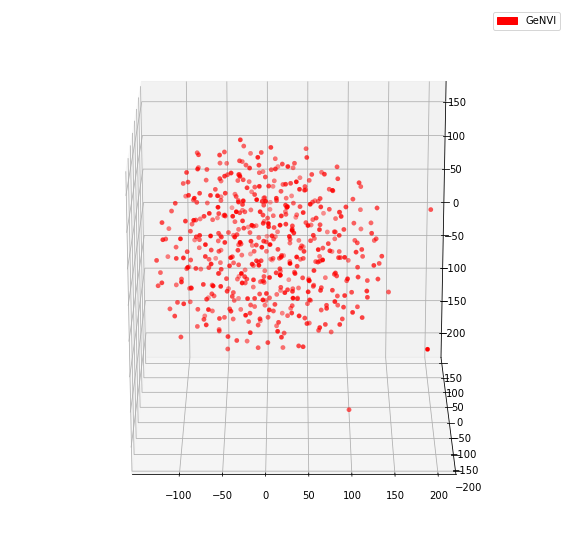

In [14]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import matplotlib.patches as mpatches

import matplotlib.cm as cm
cmap = cm.hsv


fig = plt.figure(figsize=(10, 10))




G1_patch = mpatches.Patch(color=cmap(0.), label='GeNVI')
#G2_patch = mpatches.Patch(color=cmap(.1), label='G2')
#G3_patch = mpatches.Patch(color=cmap(.2), label='G3')



ax = fig.gca(projection='3d')
ax.scatter(X_embedded_[:,0],X_embedded_[:,1],X_embedded_[:,2],color=cmap(GeNVI_theta_c), linewidth=0.2,cmap=cmap)
#plt.title('3D t-SNE of '+str(param_count)+'-dimensional transformed noise')
ax.view_init(elev=20., azim=270)

plt.legend(handles=[G1_patch])
#plt.legend(handles=[G1_patch,G2_patch])
#plt.legend(handles=[G1_patch,G2_patch,G3_patch])
plt.savefig('tSNE.pdf')
plt.show()






In [21]:
PTMCMC_theta=torch.as_tensor(torch.load('mlruns/4/1941420c5f8048aa9b5bcfa9f58714da/artifacts/theta.pt'))
HMC_theta=torch.as_tensor(torch.load('HMC_results.pt')[0][0:-1:2])
#'mlruns/4/1941420c5f8048aa9b5bcfa9f58714da/artifacts/theta.pt')
#mlruns/4/99e4ed7c648f4cee971eb1924dfc52db/artifacts/theta.pt')
#'mlruns/4/0eb6f8d414d1424784fa76fed8506198/artifacts/theta.pt')
#'mlruns/4/814abccf119b4eb1a0f68c1f67dc773f/artifacts/theta.pt')
#'mlruns/4/74654e3a649f4f47a71234edee2e4424/artifacts/theta.pt')[0:-1:1]


In [29]:
print(PTMCMC_theta.shape)
print(HMC_theta.shape)


theta_all=torch.cat([GeNVI_theta.cpu(),PTMCMC_theta, HMC_theta],dim=0)
theta_all_c=torch.cat([GeNVI_theta_c,.1*(ensemble_size+2)*torch.ones(PTMCMC_theta.shape[0]),.1*(ensemble_size+4)*torch.ones(HMC_theta.shape[0])],dim=0)

theta_all.shape[0]==theta_all_c.shape[0]

torch.Size([1111, 151])
torch.Size([1250, 151])


True

In [25]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=30)
X_embedded_p =myTSNE.fit_transform(theta_all.cpu())
print(myTSNE.kl_divergence_)
X_embedded_p.shape

0.8668768405914307


(2861, 3)

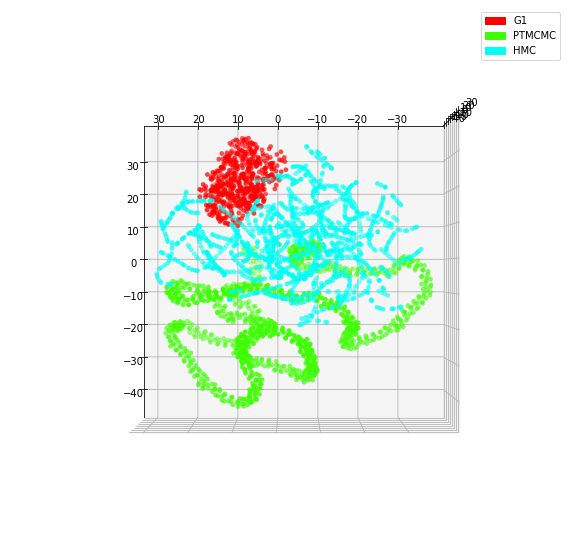

In [40]:
%matplotlib inline

import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import matplotlib.cm as cm
cmap = cm.hsv

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X_embedded_p[:,0],X_embedded_p[:,1],X_embedded_p[:,2], linewidth=0.2, c=cmap(theta_all_c), cmap=cmap)
#plt.title('3D t-SNE of '+str(param_count)+'-dimensional transformed noise')


G1_patch = mpatches.Patch(color=cmap(.0), label='G1')
#G2_patch = mpatches.Patch(color=cmap(.1), label='G2')
#G3_patch = mpatches.Patch(color=cmap(.2), label='G3')

PT_c=torch.tensor(0.1*(ensemble_size+2)).float()
HMC_c=torch.tensor(0.1*(ensemble_size+4)).float()

PTMCMC_patch = mpatches.Patch(color=cmap(PT_c), label='PTMCMC')
HMC_patch = mpatches.Patch(color=cmap(HMC_c), label='HMC')
plt.legend(handles=[G1_patch,PTMCMC_patch,HMC_patch])
#plt.legend(handles=[G1_patch,G2_patch,G3_patch,PTMCMC_patch,HMC_patch])

ax.view_init(elev=90., azim=180)
plt.savefig('PTMCMC_tSNE.pdf')
plt.show()


In [33]:
def KL(theta0,theta1,k=1):
        """
        Parameters:
            theta0 (Tensor): Samples, P X NbDimensions   
            theta1 (Tensor): Samples, R X NbDimensions   
            k (Int): positive ordinal number 

        Returns:
            (Float) k-Nearest Neighbour Estimation of the KL from theta0 to theta1  

        Kullback-Leibler Divergence Estimation of Continuous Distributions Fernando Pérez-Cruz
        """
        
        n0=theta0.shape[0]
        n1=theta1.shape[0]
        dim0=theta0.shape[1]
        dim1=theta1.shape[1]
        assert dim0 == dim1
        
   
        
        D0=torch.cdist(theta0,theta0)
        D1=torch.cdist(theta0,theta1)
        

        a0 = torch.topk(D0, k=k+1, dim=1, largest=False, sorted=True)[0][:,k]#.clamp(torch.finfo().eps,float('inf')).to(device)
        a1 = torch.topk(D1, k=k, dim=1, largest=False, sorted=True)[0][:,k-1]#.clamp(torch.finfo().eps,float('inf')).to(device)
        
        assert a0.shape == a1.shape
        
        d=torch.as_tensor(float(dim0),device=device)
        N0=torch.as_tensor(float(n0),device=device)
        N1=torch.as_tensor(float(n1),device=device)
        
        Mnn=(torch.log(a1)-torch.log(a0)).mean()
        return dim0*Mnn + N1.log()-(N0-1).log()

In [66]:
N=1000
K=torch.Tensor(N)
P_theta=PTMCMC_theta.to(device)
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    K[i]=KL(GeN(500).detach(),P_theta[indices[500:]], k=1)

print('KL(GeNVI,PTMCMC): '+str(K.mean())+' ('+str(K.std())+')')

KL(GeNVI,PTMCMC): tensor(259.6429) (tensor(3.0640))


In [67]:
N=1000
K=torch.Tensor(N)
P_theta=HMC_theta.to(device)
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    K[i]=KL(GeN(500).detach(),P_theta[indices[500:]], k=1)

print('KL(GeNVI,HMC): '+str(K.mean())+' ('+str(K.std())+')')

KL(GeNVI,HMC): tensor(258.2421) (tensor(6.6080))


In [70]:
N=1000
K=torch.Tensor(N)
H_theta=HMC_theta.to(device)
P_theta=PTMCMC_theta.to(device)
P_indices=list(range(P_theta.shape[0]))
H_indices=list(range(H_theta.shape[0]))

for i in range(N):
    np.random.shuffle(P_indices)
    np.random.shuffle(H_indices)
    K[i]=KL(P_theta[P_indices[500:]],H_theta[H_indices[500:]], k=2)

print('KL(PTMCMC,HMC): '+str(K.mean())+' ('+str(K.std())+')')

KL(PTMCMC,HMC): tensor(509.6838) (tensor(1.7947))


In [38]:
N=1000
K=torch.Tensor(N)
H_theta=HMC_theta.to(device)
P_theta=PTMCMC_theta.to(device)
HH_indices=list(range(H_theta.shape[0]))
H_indices=list(range(H_theta.shape[0]))

for i in range(N):

    K[i]=KL(GeN(500).detach(),GeN(500).detach(), k=3)

print('KL(PTMCMC,HMC): '+str(K.mean())+' ('+str(K.std())+')')

KL(PTMCMC,HMC): tensor(-0.0678) (tensor(1.3149))


In [18]:
X=torch.arange(-2.,2.,0.02).to(device)
X.shape

torch.Size([200])

In [34]:
N=1000
K=torch.Tensor(N)
P_theta_pred=model(X,PTMCMC_theta.to(device)).squeeze()
H_theta_pred=model(X,HMC_theta.to(device)).squeeze()


P_indices=list(range(P_theta.shape[0]))
H_indices=list(range(H_theta.shape[0]))


for i in range(N):
    np.random.shuffle(P_indices)
    GeNVI_pred=model(X,GeN(500).detach()).squeeze()
    K[i]=KL(GeNVI_pred,P_theta_pred[P_indices[500:]], k=2)

print('KL(GeNVI,PTMCMC): '+str(K.mean())+' ('+str(K.std())+')')

KL(GeNVI,PTMCMC): tensor(221.8674) (tensor(5.5656))


In [20]:

for i in range(N):
    np.random.shuffle(P_indices)
    np.random.shuffle(H_indices)
    K[i]=KL(P_theta_pred[P_indices[500:]],H_theta_pred[H_indices[500:]], k=2)

print('KL(PTMC,HMC): '+str(K.mean())+' ('+str(K.std())+')')

NameError: name 'P_indices' is not defined

In [75]:
for i in range(N):
    np.random.shuffle(H_indices)
    GeNVI_pred=model(X,GeN(500).detach()).squeeze()
    K[i]=KL(GeNVI_pred,H_theta_pred[H_indices[500:]], k=2)

print('KL(GeNVI,HMC): '+str(K.mean())+' ('+str(K.std())+')')

KL(GeNVI,HMC): tensor(270.9141) (tensor(10.9764))


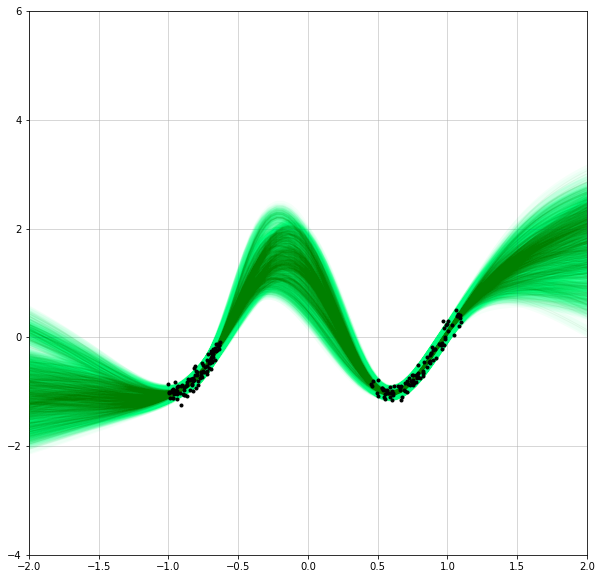

In [42]:
x=setup.makePlot(PTMCMC_theta,device)
x.savefig('PTMCMC_green_pred.png')


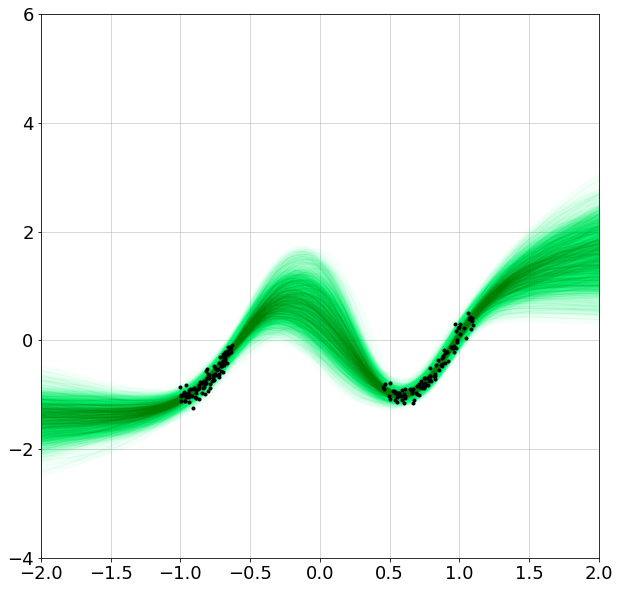

In [49]:
fig=setup.makePlot(GeNVI_theta,device)
fig.savefig('GeNVI_green_pred.svg')

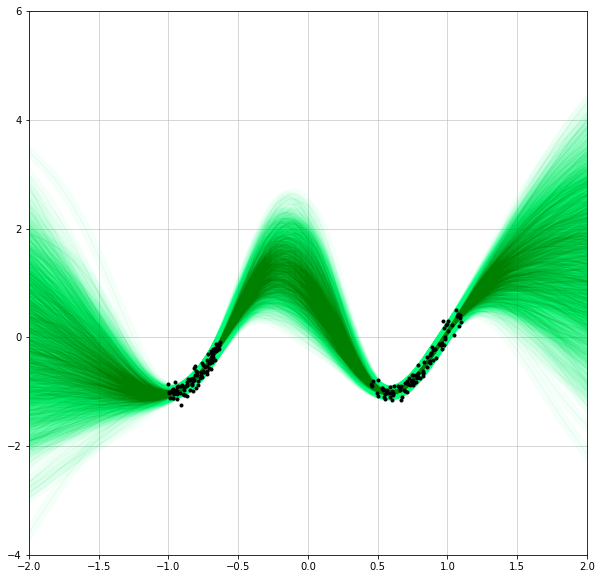

In [44]:
fig=setup.makePlot(HMC_theta,device)

In [41]:
GeNVI_pred=model(X,GeNVI_theta).squeeze()
P_theta_pred=model(X,PTMCMC_theta.to(device)).squeeze()
H_theta_pred=model(X,HMC_theta.to(device)).squeeze()

theta_pred=torch.cat([GeNVI_pred, P_theta_pred,H_theta_pred],dim=0)
theta_pred.shape

torch.Size([2861, 200])

In [42]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=100)
X_embedded_pred =myTSNE.fit_transform(theta_pred.cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

0.5888359546661377


NameError: name 'X_embedded' is not defined

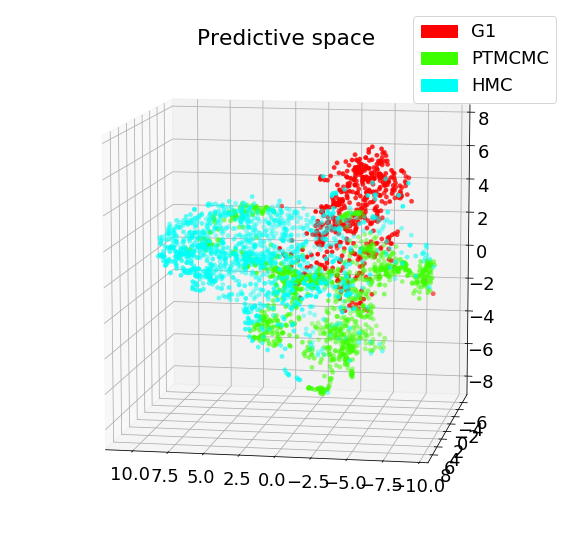

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

import matplotlib.cm as cm

cmap = cm.hsv

plt.rcParams.update({'font.size': 18})


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X_embedded_pred[:,0],X_embedded_pred[:,1],X_embedded_pred[:,2],c=cmap(theta_all_c), linewidth=0.2)
plt.title('Predictive space')
ax.view_init(elev=10., azim=100)

G1_patch = mpatches.Patch(color=cmap(.0), label='G1')
#G2_patch = mpatches.Patch(color=cmap(.1), label='G2')
#G3_patch = mpatches.Patch(color=cmap(.2), label='G3')

PT_c=torch.tensor(0.1*(ensemble_size+2)).float()
HMC_c=torch.tensor(0.1*(ensemble_size+4)).float()

PTMCMC_patch = mpatches.Patch(color=cmap(PT_c), label='PTMCMC')
HMC_patch = mpatches.Patch(color=cmap(HMC_c), label='HMC')
plt.legend(handles=[G1_patch,PTMCMC_patch,HMC_patch])
#plt.legend(handles=[G1_patch,G2_patch,G3_patch,PTMCMC_patch,HMC_patch])


plt.savefig('Predictive_tSNE.pdf')
plt.show()

In [46]:
theta=torch.cat([GeN.sample(500).detach()[0],GeN.sample(500).detach()[1], PTMCMC_theta.to(device)],)
c=torch.cat([torch.zeros(500), 0.5*torch.ones(500), torch.ones(1111)])


In [65]:
theta=torch.cat([GeN(N).detach(), PTMCMC_theta.to(device)])
theta.shape

torch.Size([5000, 151])

In [96]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=80)
X_embedded =myTSNE.fit_transform(theta.cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

1.1433414220809937


(5000, 3)

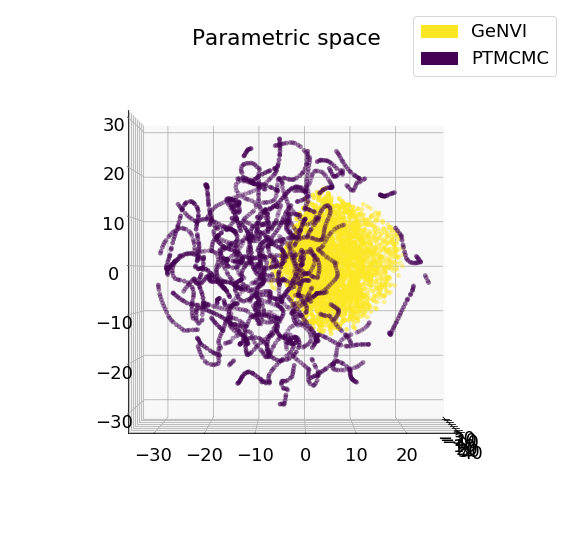

In [98]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 18})


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=c, linewidth=0.2, cmap=cmap)
plt.title('Parametric space')

ax.view_init(elev=0., azim=0)

GeNVI_patch = mpatches.Patch(color=cmap(0.), label='GeNVI')
PTMCMC_patch = mpatches.Patch(color=cmap(1.), label='PTMCMC')
plt.legend(handles=[GeNVI_patch,PTMCMC_patch])

plt.savefig('Parametric_tSNE.pdf')
plt.show()



Text(0.5, 1.0, '134 vs 73')

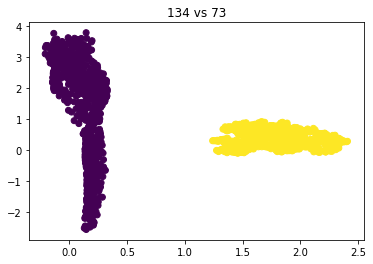

In [59]:
%matplotlib inline
i=np.random.randint(0,theta.shape[1])
j=np.random.randint(0,theta.shape[1])
X=theta[:,i].cpu()
Y=theta[:,j].cpu()
plt.scatter(X,Y, c=c)
plt.title(str(i)+' vs '+str(j))